<img src="./images/blackfin_logo_white.png" style="float: left; margin: 0 20px 0 20px; height: 120px">

# Ames House Price Prediction

A machine learning model by BlackFin corporation

# Introduction
## Background
With the recent volatile housing market in the US [(source)](https://money.yahoo.com/housing-market-extremely-volatile-with-private-equity-accounting-for-a-third-of-the-sales-expert-152958055.html), alot of home owners are unsure of the valuation of their homes. This resulted in home owners either leaving money on table when transacting below market rate, or pricing it too high and having no sales even though their house has been listed for ages. This problem also affects the rental market as home owners generally use the home value to price the monthly rentals.

## Mission
Blackfin, much like its competitor, [Redfin](https://www.redfin.com/why-redfin), prides itself in being a **data first** real estate company. As the data science team of BlackFin, we set forth to use machine learning to predict the most accurate house prices in the Ames region. This proprietary algorithim will also be released to the public. We expect this model to
1) help home owners to get the most accurate prices on their home
2) which in turn, will encourage home owners to sell the houses to Blackfin
3) Utilising our interior experts to renovate, design and optimise for property listing, we will price the house again using this model and sell it to the market at a markup
4) Estimate renovation, designing budget for blackfin internal team based on expected bought price from home owners and expected sale price in the future

## Problem Statement
To assist both BlackFin and home owners to get the most accurate house prices using historical data

## Scope
Based on the data of house sold between 2006 and 2010, we aim to train a regression model that is highly accurate in predicting home sale prices in the Ames region

## Success Factor
Our model success would be evaluated based on
- How close our predicted model is to the actual sale price (for existing training and testing data)
- How long long does the house stay on the market and how far is our initial price vs the final sale price (for future newly predicted houses)

## Dataset
- [`train.csv`](./datasets/train.csv): Datasets of Ames Housing data between 2006 and 2010 with Saleprice
- [`test.csv`](./datasets/test.csv): Datasets of Ames Housing data without Saleprice

# Table of Contents:
- [Data and Package Import](#Data-and-Package-Import)
- [Data Cleaning](#Data-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Baseline Model](#Baseline-Model)
- [Exploratory model evaluation](#Exploratory-Model-Evaluation)
- [Final Model](#Final-Model-(Pycaret-with-Preprocessing))
- [Model Deployment](#Model-Deployment)
- [Conclusion](#Conclusion)

# Data and Package Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures, PowerTransformer, OrdinalEncoder
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_regression, f_classif
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from pycaret.regression import *

In [2]:
df_org = pd.read_csv('datasets/train.csv')

In [3]:
df_submit_org = pd.read_csv('datasets/test.csv')

# Data Cleaning

In [4]:
df_org.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
3       Reg          Lvl    AllPub     Inside        Gtl       Timber   
4       IR1          Lvl    AllPub     Inside        Gtl      SawyerW   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        RRAe        Norm      1Fam      2Story             6             8   
1        Norm        Norm      1Fam      2Story             7             5   
2        Norm        Norm      1Fam      1Story             5             7   
3        Norm        Norm      1Fam      2Story             5             5   
4        Norm        Norm      1Fam      1.5Fin             6             8   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1976            2005      Gable   CompShg      HdBoard      Plywood   
1        1996            1997      Gable   CompShg      VinylSd      VinylSd   
2        1953            2007      Gable   CompShg      VinylSd      VinylSd   
3        2006            2007      Gable   CompShg      VinylSd      VinylSd   
4        1900            1993      Gable   CompShg      Wd Sdng      Plywood   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0      BrkFace         289.0         Gd         TA     CBlock        TA   
1      BrkFace         132.0         Gd         TA      PConc        Gd   
2         None           0.0         TA         Gd     CBlock        TA   
3         None           0.0         TA         TA      PConc        Gd   
4         None           0.0         TA         TA      PConc        Fa   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            GLQ         533.0            Unf   
1        TA            No            GLQ         637.0            Unf   
2        TA            No            GLQ         731.0            Unf   
3        TA            No            Unf           0.0            Unf   
4        Gd            No            Unf           0.0            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0           0.0        192.0          725.0    GasA         Ex           Y   
1           0.0        276.0          913.0    GasA         Ex           Y   
2           0.0        326.0         1057.0    GasA         TA           Y   
3           0.0        384.0          384.0    GasA         Gd           Y   
4           0.0        676.0          676.0    GasA         TA           Y   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      SBrkr         725         754                0         1479   
1      SBrkr         913        1209                0         2122   
2      SBrkr        1057           0                0         1057   
3      SBrkr         744         700                0         1444   
4      SBrkr         831         614                0         1445   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0             0.0             0.0          2          1              3   
1             1.0             0.0          2          1              4   
2             1.0             0.0          1          0              3   
3             0.0             0.0          2  

In [5]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [6]:
# drop unnecessary id data
df_org.drop(['Id','PID'], axis = 1, inplace = True)
df_org

MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley Lot Shape  \
0              60        RL           NaN     13517   Pave   NaN       IR1   
1              60        RL          43.0     11492   Pave   NaN       IR1   
2              20        RL          68.0      7922   Pave   NaN       Reg   
3              60        RL          73.0      9802   Pave   NaN       Reg   
4              50        RL          82.0     14235   Pave   NaN       IR1   
...           ...       ...           ...       ...    ...   ...       ...   
2046           20        RL          79.0     11449   Pave   NaN       IR1   
2047           30        RL           NaN     12342   Pave   NaN       IR1   
2048           50        RL          57.0      7558   Pave   NaN       Reg   
2049           20        RL          80.0     10400   Pave   NaN       Reg   
2050           60        RL          60.0      7500   Pave   NaN       Reg   

     Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1  \
0             Lvl    AllPub    CulDSac        Gtl       Sawyer        RRAe   
1             Lvl    AllPub    CulDSac        Gtl      SawyerW        Norm   
2             Lvl    AllPub     Inside        Gtl        NAmes        Norm   
3             Lvl    AllPub     Inside        Gtl       Timber        Norm   
4             Lvl    AllPub     Inside        Gtl      SawyerW        Norm   
...           ...       ...        ...        ...          ...         ...   
2046          HLS    AllPub     Inside        Gtl       Timber        Norm   
2047          Lvl    AllPub     Inside        Gtl      Edwards        Norm   
2048          Bnk    AllPub     Inside        Gtl      Crawfor        Norm   
2049          Lvl    AllPub     Corner        Gtl        NAmes        Norm   
2050          Lvl    AllPub     Inside        Gtl      Gilbert        Norm   

     Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0           Norm      1Fam      2Story             6             8   
1           Norm      1Fam      2Story             7             5   
2           Norm      1Fam      1Story             5             7   
3           Norm      1Fam      2Story             5             5   
4           Norm      1Fam      1.5Fin             6             8   
...          ...       ...         ...           ...           ...   
2046        Norm      1Fam      1Story             8             5   
2047        Norm      1Fam      1Story             4             5   
2048        Norm      1Fam      1.5Fin             6             6   
2049        Norm      1Fam      1Story             4             5   
2050        Norm      1Fam      2Story             7             5   

      Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st  \
0           1976            2005      Gable   CompShg      HdBoard   
1           1996            1997      Gable   CompShg      VinylSd   
2           1953            2007      Gable   CompShg      VinylSd   
3           2006            2007      Gable   CompShg      VinylSd   
4           1900            1993      Gable   CompShg      Wd Sdng   
...          ...             ...        ...       ...          ...   
2046        2007            2007      Gable   CompShg      VinylSd   
2047        1940            1950      Gable   CompShg      VinylSd   
2048        1928            1950      Gable   CompShg      BrkFace   
2049        1956            1956      Gable   CompShg      Plywood   
2050        1999            1999      Gable   CompShg      VinylSd   

     Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation  \
0         Plywood      BrkFace         289.0         Gd         TA     CBlock   
1         VinylSd      BrkFace         132.0         Gd         TA      PConc   
2         VinylSd         None           0.0         TA         Gd     CBlock   
3         VinylSd         None           0.0         TA         TA      PConc   
4         Plywood         None           0.0 

In [7]:
categorical_features = [
    'MS SubClass',
    'MS Zoning',
    'Street',
    'Alley',
    'Lot Shape',
    'Land Contour',
    'Utilities',
    'Lot Config',
    'Land Slope',
    'Neighborhood',
    'Condition 1',
    'Condition 2',
    'Bldg Type',
    'House Style',
    'Roof Style',
    'Roof Matl',
    'Exterior 1st',
    'Exterior 2nd',
    'Mas Vnr Type',
    'Exter Qual',
    'Exter Cond',
    'Foundation',
    'Bsmt Qual',
    'Bsmt Cond',
    'Bsmt Exposure',
    'BsmtFin Type 1',
    'BsmtFin Type 2',
    'Heating',
    'Heating QC',
    'Central Air',
    'Electrical',
    'Kitchen Qual',
    'Functional',
    'Fireplace Qu',
    'Garage Type',
    'Garage Finish',
    'Garage Qual',
    'Garage Cond',
    'Paved Drive',
    'Pool QC',
    'Fence',
    'Misc Feature',
    'Sale Type'
]

In [8]:
numerical_features = df_org.columns[~df_org.columns.isin(categorical_features)].to_list()
numerical_features

['Lot Frontage',
 'Lot Area',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Yr Blt',
 'Garage Cars',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'Mo Sold',
 'Yr Sold',
 'SalePrice']

## Resolve null numerical values

In [9]:
numeric_df = df_org.loc[:,numerical_features]
numeric_df

Lot Frontage  Lot Area  Overall Qual  Overall Cond  Year Built  \
0              NaN     13517             6             8        1976   
1             43.0     11492             7             5        1996   
2             68.0      7922             5             7        1953   
3             73.0      9802             5             5        2006   
4             82.0     14235             6             8        1900   
...            ...       ...           ...           ...         ...   
2046          79.0     11449             8             5        2007   
2047           NaN     12342             4             5        1940   
2048          57.0      7558             6             6        1928   
2049          80.0     10400             4             5        1956   
2050          60.0      7500             7             5        1999   

      Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  \
0               2005         289.0         533.0           0.0        192.0   
1               1997         132.0         637.0           0.0        276.0   
2               2007           0.0         731.0           0.0        326.0   
3               2007           0.0           0.0           0.0        384.0   
4               1993           0.0           0.0           0.0        676.0   
...              ...           ...           ...           ...          ...   
2046            2007           0.0        1011.0           0.0        873.0   
2047            1950           0.0         262.0           0.0        599.0   
2048            1950           0.0           0.0           0.0        896.0   
2049            1956           0.0         155.0         750.0        295.0   
2050            1999           0.0           0.0           0.0        994.0   

      Total Bsmt SF  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0             725.0         725         754                0         1479   
1             913.0         913        1209                0         2122   
2            1057.0        1057           0                0         1057   
3             384.0         744         700                0         1444   
4             676.0         831         614                0         1445   
...             ...         ...         ...              ...          ...   
2046         1884.0        1728           0                0         1728   
2047          861.0         861           0                0          861   
2048          896.0        1172         741                0         1913   
2049         1200.0        1200           0                0         1200   
2050          994.0        1028         776                0         1804   

      Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0                0.0             0.0          2          1              3   
1                1.0             0.0          2          1              4   
2                1.0             0.0          1          0              3   
3                0.0             0.0          2          1              3   
4                0.0             0.0          2          0              3   
...              ...             ...        ...        ...            ...   
2046             1.0             0.0          2          0              3   
2047             0.0             0.0          1          0              1   
2048             0.0             0.0          1          1              3   
2049             1.0             0.0          1          0              3   
2050             0.0             0.0          2          1              3   

      Kitchen AbvGr  TotRms AbvGrd  Fireplaces  Garage Yr Blt  Garage Cars  \
0                 1              6           0         1976.0          2.0   
1                 1              8           1         1997.0          2.0   
2                 1              5           0         1953.0          1.0   
3                 1           

In [10]:
numeric_df.isnull().sum().sort_values(ascending = False)

Lot Frontage       330
Garage Yr Blt      114
Mas Vnr Area        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Total Bsmt SF        1
Garage Cars          1
Garage Area          1
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Open Porch SF        0
Wood Deck SF         0
Yr Sold              0
Enclosed Porch       0
3Ssn Porch           0
Mo Sold              0
Fireplaces           0
Pool Area            0
Misc Val             0
Screen Porch         0
Half Bath            0
TotRms AbvGrd        0
Kitchen AbvGr        0
Bedroom AbvGr        0
Lot Area             0
Full Bath            0
Gr Liv Area          0
Low Qual Fin SF      0
2nd Flr SF           0
1st Flr SF           0
Year Remod/Add       0
Year Built           0
Overall Cond         0
Overall Qual         0
SalePrice            0
dtype: int64

### Lot Frontage

In [11]:
#Lot Frontage
numeric_df[['Lot Area', 'Lot Frontage']][numeric_df['Lot Frontage'].isnull()].sort_values(by='Lot Area')

Lot Area  Lot Frontage
200       1533           NaN
1515      1700           NaN
1527      2117           NaN
403       2117           NaN
454       2403           NaN
106       2651           NaN
950       2665           NaN
295       2887           NaN
1223      2938           NaN
50        2998           NaN
1813      3072           NaN
1438      3136           NaN
208       3196           NaN
1311      3196           NaN
1121      3612           NaN
504       3621           NaN
339       3696           NaN
511       3940           NaN
1216      4224           NaN
1741      4403           NaN
293       4426           NaN
1611      4435           NaN
1469      4435           NaN
575       4435           NaN
226       4500           NaN
541       4538           NaN
117       4765           NaN
327       4928           NaN
660       5100           NaN
430       5105           NaN
166       5700           NaN
1212      5700           NaN
309       5814           NaN
576       5890           NaN
1631      6173           NaN
1079      6240           NaN
547       6240           NaN
75        6291           NaN
1414      6563           NaN
919       6615           NaN
1565      6718           NaN
1313      6820           NaN
531       6853           NaN
142       6897           NaN
268       7050           NaN
334       7082           NaN
1185      7153           NaN
557       7162           NaN
1536      7176           NaN
169       7400           NaN
871       7424           NaN
1508      7425           NaN
1736      7446           NaN
444       7472           NaN
1430      7500           NaN
1533      7500           NaN
1017      7500           NaN
1067      7655           NaN
716       7703           NaN
1608      7750           NaN
1606      7750           NaN
767       7750           NaN
1765      7758           NaN
2016      7791           NaN
830       7830           NaN
1941      7851           NaN
176       7861           NaN
750       7915           NaN
411       7917           NaN
555       7920           NaN
1605      7939           NaN
23        7980           NaN
1316      8000           NaN
1113      8010           NaN
1436      8010           NaN
452       8014           NaN
1783      8020           NaN
553       8050           NaN
1030      8063           NaN
1426      8068           NaN
1105      8076           NaN
742       8098           NaN
938       8121           NaN
1791      8145           NaN
1742      8174           NaN
1211      8239           NaN
1240      8396           NaN
1943      8398           NaN
850       8475           NaN
1873      8530           NaN
1125      8544           NaN
732       8544           NaN
372       8638           NaN
141       8658           NaN
1338      8685           NaN
1882      8740           NaN
982       8750           NaN
335       8755           NaN
1757      8789           NaN
1745      8795           NaN
148       8826           NaN
1668      8880           NaN
161       8883           NaN
416       8885           NaN
549       8900           NaN
1427      8917           NaN
1370      8926           NaN
1393      8963           NaN
1822      8970           NaN
1513      8978           NaN
114       9000           NaN
691       9019           NaN
1514      9079           NaN
42        9101           NaN
284       9125           NaN
500       9130           NaN
957       9156           NaN
668       9205           NaN
1660      9216           NaN
603       9240           NaN
1398      9248           NaN
731       9303           NaN
1475      9308           NaN
876       9316           NaN
1357      9373           NaN
1275      9375           NaN
1183      9450           NaN
1070      9505           NaN
1450      9531           NaN
1597      9535           NaN
1049      9555           NaN
435       9556           NaN
1004      9572           NaN
628       9610           NaN
490       9636           NaN
1521      9638           NaN
661       9720           NaN
463 

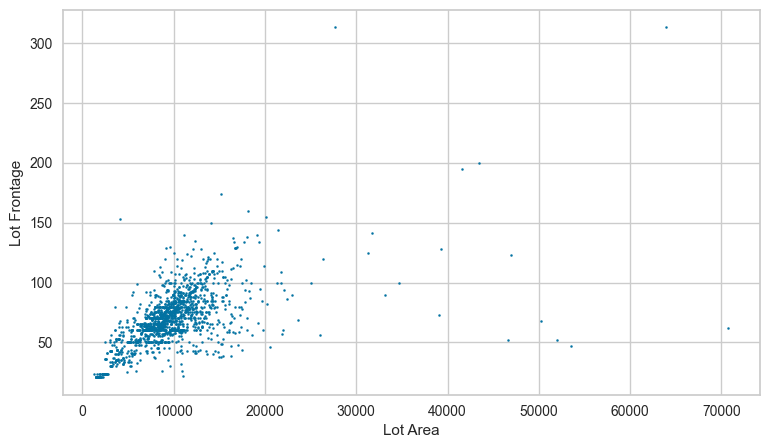

In [12]:
plt.figure(figsize=(9,5))
plt.scatter(numeric_df['Lot Area'], numeric_df['Lot Frontage'], s=2)
plt.xlabel('Lot Area')
plt.ylabel('Lot Frontage');

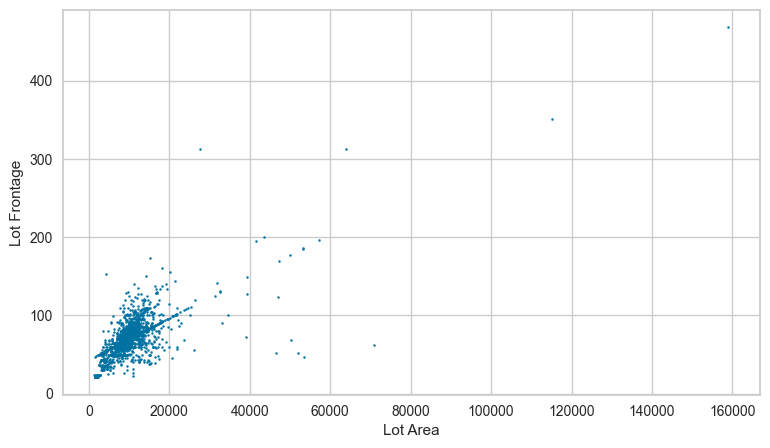

In [13]:
#because the graph shows a linear pattern, we will impute the missing value using linear regression
it_imp_lot_frontage = IterativeImputer(estimator = LinearRegression())
df_lot_test = it_imp_lot_frontage.fit_transform(df_org[['Lot Area', 'Lot Frontage']])
df_lot_test = pd.DataFrame(df_lot_test, columns = ['Lot Area', 'Lot Frontage'])
plt.figure(figsize=(9,5))
plt.scatter(df_lot_test['Lot Area'], df_lot_test['Lot Frontage'], s=2)
plt.xlabel('Lot Area')
plt.ylabel('Lot Frontage');

In [14]:
#assign back to original df
numeric_df['Lot Frontage'] = df_lot_test['Lot Frontage']

In [15]:
numeric_df[['Lot Area', 'Lot Frontage']]

Lot Area  Lot Frontage
0        13517     79.466028
1        11492     43.000000
2         7922     68.000000
3         9802     73.000000
4        14235     82.000000
...        ...           ...
2046     11449     79.000000
2047     12342     76.324951
2048      7558     57.000000
2049     10400     80.000000
2050      7500     60.000000

[2051 rows x 2 columns]

### Garage Yr Blt

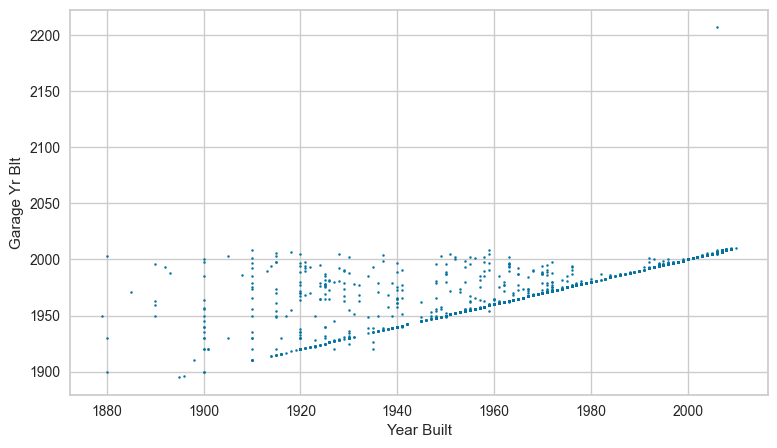

In [16]:
plt.figure(figsize=(9,5))
plt.scatter(numeric_df['Year Built'], numeric_df['Garage Yr Blt'], s=2)
plt.xlabel('Year Built')
plt.ylabel('Garage Yr Blt');

In [17]:
#remove outlier as the age of above 2022 is obviously keyed in wrongly
numeric_df['Garage Yr Blt'][numeric_df['Garage Yr Blt']>2100] = np.nan

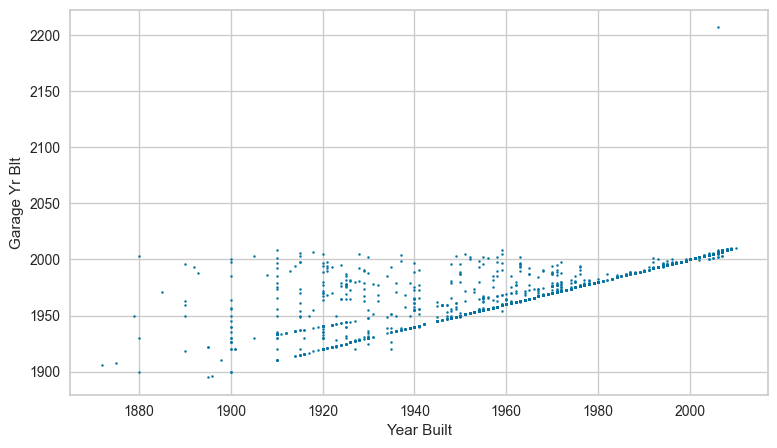

In [18]:
#because the graph shows a linear pattern, we will impute the missing value using linear regression
it_imp_garage_yr = IterativeImputer(estimator = LinearRegression())
df_yrblt_test = it_imp_garage_yr.fit_transform(df_org[['Year Built', 'Garage Yr Blt']])
df_yrblt_test = pd.DataFrame(df_yrblt_test, columns = ['Year Built', 'Garage Yr Blt'])
plt.figure(figsize=(9,5))
plt.scatter(df_yrblt_test['Year Built'], df_yrblt_test['Garage Yr Blt'], s=2)
plt.xlabel('Year Built')
plt.ylabel('Garage Yr Blt');

In [19]:
#assign back to original df
numeric_df['Garage Yr Blt'] = df_yrblt_test['Garage Yr Blt']

### Other features
We will just use mean as a strategy to imput for rest of the null value with only 1 or 2 missing values as well as Mas Vnr Area

In [20]:
simp_imp = SimpleImputer(strategy = 'mean')
df_imp = simp_imp.fit_transform(numeric_df.iloc[:,:-1]) #do fitting without salesprice so that we can do the same for test data later as well
numeric_df.iloc[:,:-1] = pd.DataFrame(df_imp, columns = numeric_df.iloc[:,:-1].columns)
numeric_df

Lot Frontage  Lot Area  Overall Qual  Overall Cond  Year Built  \
0        79.466028   13517.0           6.0           8.0      1976.0   
1        43.000000   11492.0           7.0           5.0      1996.0   
2        68.000000    7922.0           5.0           7.0      1953.0   
3        73.000000    9802.0           5.0           5.0      2006.0   
4        82.000000   14235.0           6.0           8.0      1900.0   
...            ...       ...           ...           ...         ...   
2046     79.000000   11449.0           8.0           5.0      2007.0   
2047     76.324951   12342.0           4.0           5.0      1940.0   
2048     57.000000    7558.0           6.0           6.0      1928.0   
2049     80.000000   10400.0           4.0           5.0      1956.0   
2050     60.000000    7500.0           7.0           5.0      1999.0   

      Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  \
0             2005.0         289.0         533.0           0.0        192.0   
1             1997.0         132.0         637.0           0.0        276.0   
2             2007.0           0.0         731.0           0.0        326.0   
3             2007.0           0.0           0.0           0.0        384.0   
4             1993.0           0.0           0.0           0.0        676.0   
...              ...           ...           ...           ...          ...   
2046          2007.0           0.0        1011.0           0.0        873.0   
2047          1950.0           0.0         262.0           0.0        599.0   
2048          1950.0           0.0           0.0           0.0        896.0   
2049          1956.0           0.0         155.0         750.0        295.0   
2050          1999.0           0.0           0.0           0.0        994.0   

      Total Bsmt SF  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0             725.0       725.0       754.0              0.0       1479.0   
1             913.0       913.0      1209.0              0.0       2122.0   
2            1057.0      1057.0         0.0              0.0       1057.0   
3             384.0       744.0       700.0              0.0       1444.0   
4             676.0       831.0       614.0              0.0       1445.0   
...             ...         ...         ...              ...          ...   
2046         1884.0      1728.0         0.0              0.0       1728.0   
2047          861.0       861.0         0.0              0.0        861.0   
2048          896.0      1172.0       741.0              0.0       1913.0   
2049         1200.0      1200.0         0.0              0.0       1200.0   
2050          994.0      1028.0       776.0              0.0       1804.0   

      Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0                0.0             0.0        2.0        1.0            3.0   
1                1.0             0.0        2.0        1.0            4.0   
2                1.0             0.0        1.0        0.0            3.0   
3                0.0             0.0        2.0        1.0            3.0   
4                0.0             0.0        2.0        0.0            3.0   
...              ...             ...        ...        ...            ...   
2046             1.0             0.0        2.0        0.0            3.0   
2047             0.0             0.0        1.0        0.0            1.0   
2048             0.0             0.0        1.0        1.0            3.0   
2049             1.0             0.0        1.0        0.0            3.0   
2050             0.0             0.0        2.0        1.0            3.0   

      Kitchen AbvGr  TotRms AbvGrd  Fireplaces  Garage Yr Blt  Garage Cars  \
0               1.0            6.0         0.0         1976.0          2.0   
1               1.0            8.0         1.0         1997.0          2.0   
2               1.0            5.0         0.0         1953.0          1.0   
3               1.0           

In [21]:
numeric_df.isnull().sum().sort_values(ascending = False).head(10)

Lot Frontage     0
Lot Area         0
Kitchen AbvGr    0
TotRms AbvGrd    0
Fireplaces       0
Garage Yr Blt    0
Garage Cars      0
Garage Area      0
Wood Deck SF     0
Open Porch SF    0
dtype: int64

## Resolve null categorical values

In [22]:
df_org[categorical_features].isnull().sum().sort_values(ascending = False)

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Garage Cond        114
Garage Qual        114
Garage Finish      114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
BsmtFin Type 1      55
Bsmt Qual           55
Bsmt Cond           55
Mas Vnr Type        22
Kitchen Qual         0
Electrical           0
Central Air          0
Heating QC           0
Heating              0
Functional           0
Paved Drive          0
MS SubClass          0
Foundation           0
MS Zoning            0
Condition 1          0
Street               0
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 2          0
Exter Cond           0
Bldg Type            0
House Style          0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Exter Qual           0
Sale Type            0
dtype: int6

In [23]:
category_df = df_org[categorical_features]

In [24]:
category_df = category_df.fillna('0')

In [25]:
#change 'Ms SubClass' to string type
category_df['MS SubClass'] = category_df['MS SubClass'].astype(str)

## Concantenate cleaned data

In [26]:
df_cleaned = pd.concat([numeric_df, category_df], axis = 1)

In [27]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 79 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Lot Frontage     2051 non-null   float64
 1   Lot Area         2051 non-null   float64
 2   Overall Qual     2051 non-null   float64
 3   Overall Cond     2051 non-null   float64
 4   Year Built       2051 non-null   float64
 5   Year Remod/Add   2051 non-null   float64
 6   Mas Vnr Area     2051 non-null   float64
 7   BsmtFin SF 1     2051 non-null   float64
 8   BsmtFin SF 2     2051 non-null   float64
 9   Bsmt Unf SF      2051 non-null   float64
 10  Total Bsmt SF    2051 non-null   float64
 11  1st Flr SF       2051 non-null   float64
 12  2nd Flr SF       2051 non-null   float64
 13  Low Qual Fin SF  2051 non-null   float64
 14  Gr Liv Area      2051 non-null   float64
 15  Bsmt Full Bath   2051 non-null   float64
 16  Bsmt Half Bath   2051 non-null   float64
 17  Full Bath     

## Check and remove multicollinear features

In [28]:
enc = OrdinalEncoder()

category_df_enc = pd.DataFrame(enc.fit_transform(category_df), columns = category_df.columns)

In [29]:
df_temp = pd.concat([numeric_df, category_df_enc], axis = 1)

In [30]:
df_temp_corr = df_temp.corr()

In [31]:
for col in df_temp_corr.columns:
    corr_check = df_temp_corr.loc[:,col].sort_values(ascending=False)
    result = corr_check[(corr_check>0.8) & (corr_check<1)]
    print(col)
    print(result)
    print("***\n")

Lot Frontage
Series([], Name: Lot Frontage, dtype: float64)
***

Lot Area
Series([], Name: Lot Area, dtype: float64)
***

Overall Qual
SalePrice    0.800207
Name: Overall Qual, dtype: float64
***

Overall Cond
Series([], Name: Overall Cond, dtype: float64)
***

Year Built
Garage Yr Blt    0.840769
Name: Year Built, dtype: float64
***

Year Remod/Add
Series([], Name: Year Remod/Add, dtype: float64)
***

Mas Vnr Area
Series([], Name: Mas Vnr Area, dtype: float64)
***

BsmtFin SF 1
Series([], Name: BsmtFin SF 1, dtype: float64)
***

BsmtFin SF 2
Series([], Name: BsmtFin SF 2, dtype: float64)
***

Bsmt Unf SF
Series([], Name: Bsmt Unf SF, dtype: float64)
***

Total Bsmt SF
1st Flr SF    0.808665
Name: Total Bsmt SF, dtype: float64
***

1st Flr SF
Total Bsmt SF    0.808665
Name: 1st Flr SF, dtype: float64
***

2nd Flr SF
Series([], Name: 2nd Flr SF, dtype: float64)
***

Low Qual Fin SF
Series([], Name: Low Qual Fin SF, dtype: float64)
***

Gr Liv Area
TotRms AbvGrd    0.813333
Name: Gr Liv 

In [32]:
#Based on the above filter, we will remove the following features as they have high correlation (>0.8) with other features. 
high_corr_features = ["Garage Yr Blt", "Total Bsmt SF", "TotRms AbvGrd", "Garage Cars", "Exterior 2nd", "Fireplace Qu", "Garage Qual", "Pool QC"]

In [33]:
#Create new list of numerical and categorical features
categorical_features_cleaned = [cat for cat in categorical_features if cat not in high_corr_features]
numerical_features_cleaned = [cat for cat in numerical_features if cat not in high_corr_features]

In [34]:
df_cleaned = df_cleaned.drop(high_corr_features, axis = 1)
df_cleaned

Lot Frontage  Lot Area  Overall Qual  Overall Cond  Year Built  \
0        79.466028   13517.0           6.0           8.0      1976.0   
1        43.000000   11492.0           7.0           5.0      1996.0   
2        68.000000    7922.0           5.0           7.0      1953.0   
3        73.000000    9802.0           5.0           5.0      2006.0   
4        82.000000   14235.0           6.0           8.0      1900.0   
...            ...       ...           ...           ...         ...   
2046     79.000000   11449.0           8.0           5.0      2007.0   
2047     76.324951   12342.0           4.0           5.0      1940.0   
2048     57.000000    7558.0           6.0           6.0      1928.0   
2049     80.000000   10400.0           4.0           5.0      1956.0   
2050     60.000000    7500.0           7.0           5.0      1999.0   

      Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  \
0             2005.0         289.0         533.0           0.0        192.0   
1             1997.0         132.0         637.0           0.0        276.0   
2             2007.0           0.0         731.0           0.0        326.0   
3             2007.0           0.0           0.0           0.0        384.0   
4             1993.0           0.0           0.0           0.0        676.0   
...              ...           ...           ...           ...          ...   
2046          2007.0           0.0        1011.0           0.0        873.0   
2047          1950.0           0.0         262.0           0.0        599.0   
2048          1950.0           0.0           0.0           0.0        896.0   
2049          1956.0           0.0         155.0         750.0        295.0   
2050          1999.0           0.0           0.0           0.0        994.0   

      1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  \
0          725.0       754.0              0.0       1479.0             0.0   
1          913.0      1209.0              0.0       2122.0             1.0   
2         1057.0         0.0              0.0       1057.0             1.0   
3          744.0       700.0              0.0       1444.0             0.0   
4          831.0       614.0              0.0       1445.0             0.0   
...          ...         ...              ...          ...             ...   
2046      1728.0         0.0              0.0       1728.0             1.0   
2047       861.0         0.0              0.0        861.0             0.0   
2048      1172.0       741.0              0.0       1913.0             0.0   
2049      1200.0         0.0              0.0       1200.0             1.0   
2050      1028.0       776.0              0.0       1804.0             0.0   

      Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  Kitchen AbvGr  \
0                0.0        2.0        1.0            3.0            1.0   
1                0.0        2.0        1.0            4.0            1.0   
2                0.0        1.0        0.0            3.0            1.0   
3                0.0        2.0        1.0            3.0            1.0   
4                0.0        2.0        0.0            3.0            1.0   
...              ...        ...        ...            ...            ...   
2046             0.0        2.0        0.0            3.0            1.0   
2047             0.0        1.0        0.0            1.0            1.0   
2048             0.0        1.0        1.0            3.0            1.0   
2049             0.0        1.0        0.0            3.0            1.0   
2050             0.0        2.0        1.0            3.0            1.0   

      Fireplaces  Garage Area  Wood Deck SF  Open Porch SF  Enclosed Porch  \
0            0.0        475.0           0.0           44.0             0.0   
1            1.0        559.0           0.0           74.0             0.0   
2            0.0        246.0           0.0           52.0             0.0   
3            0.0        400.0 

## Remove Outliers of salesprice

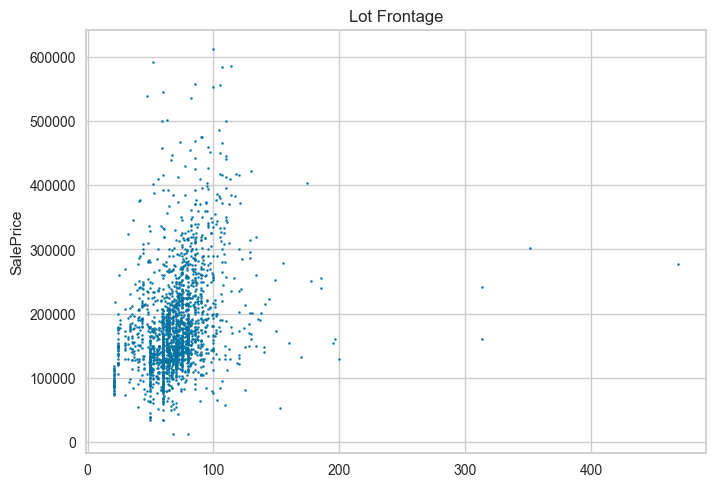

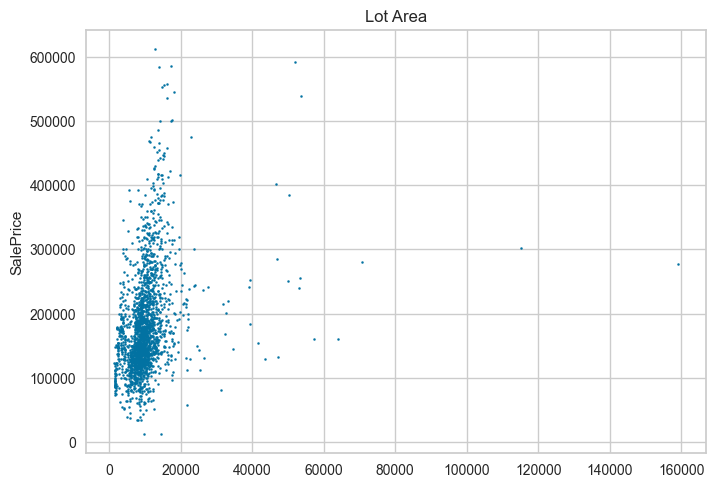

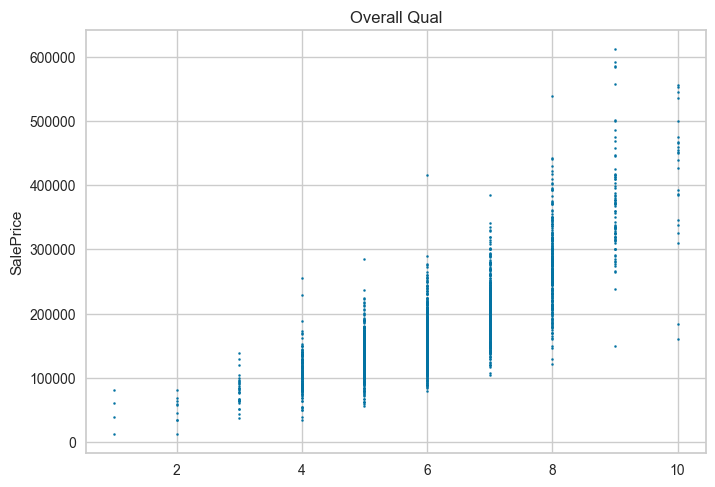

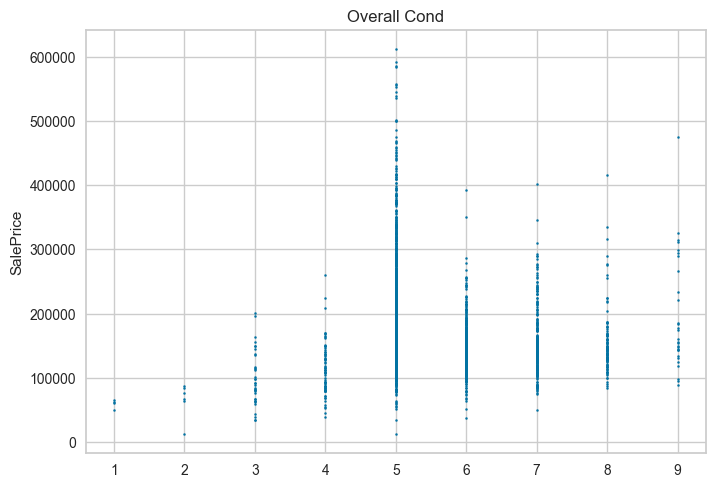

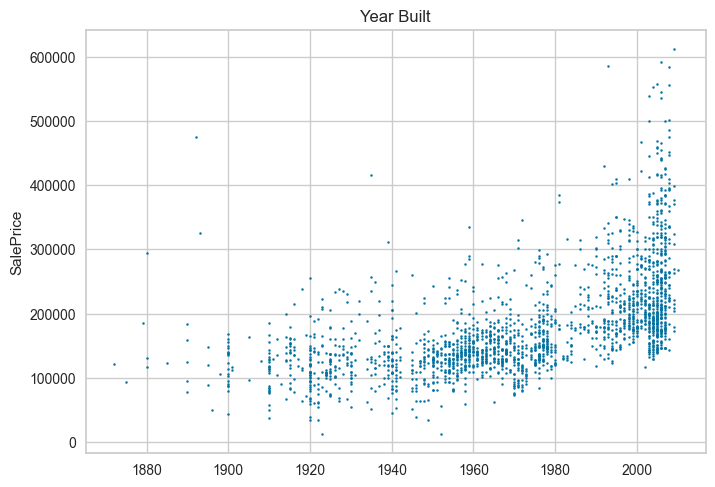

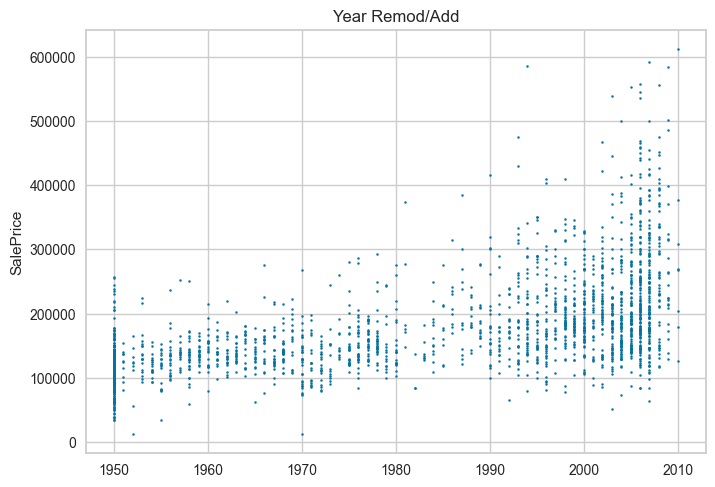

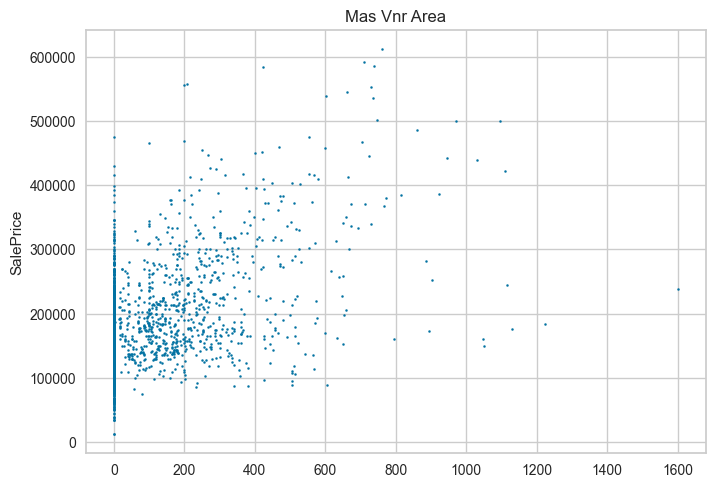

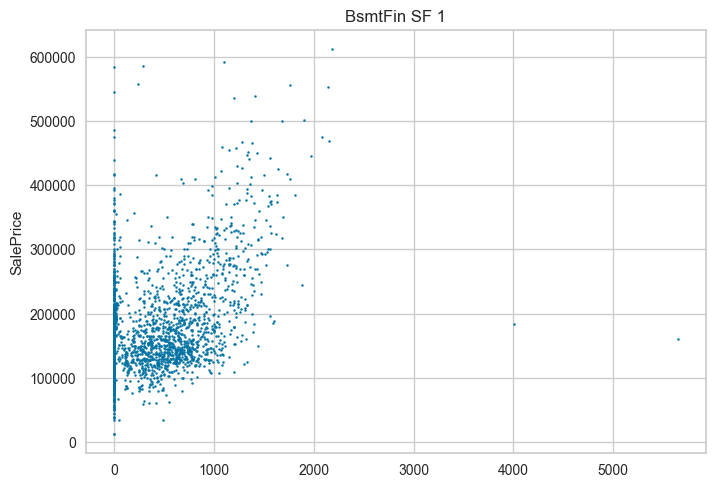

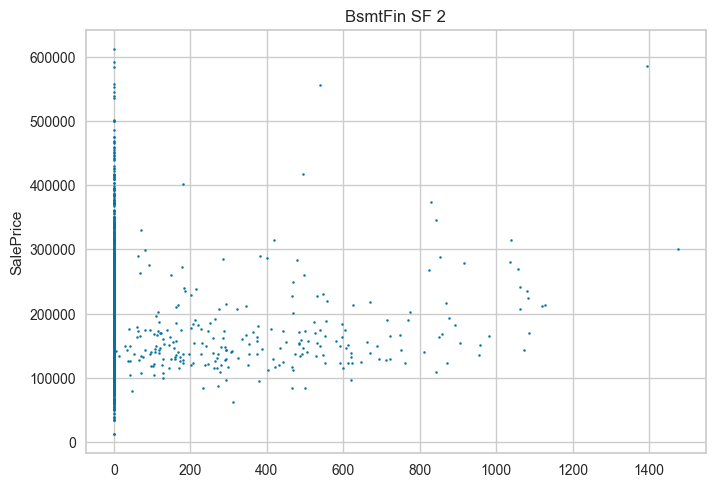

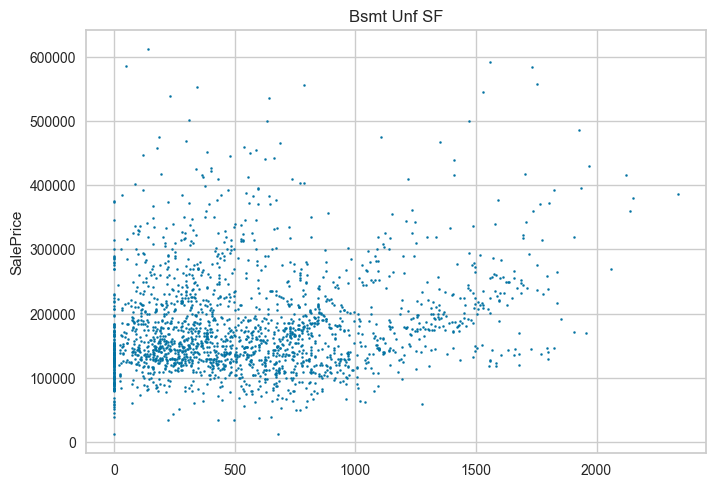

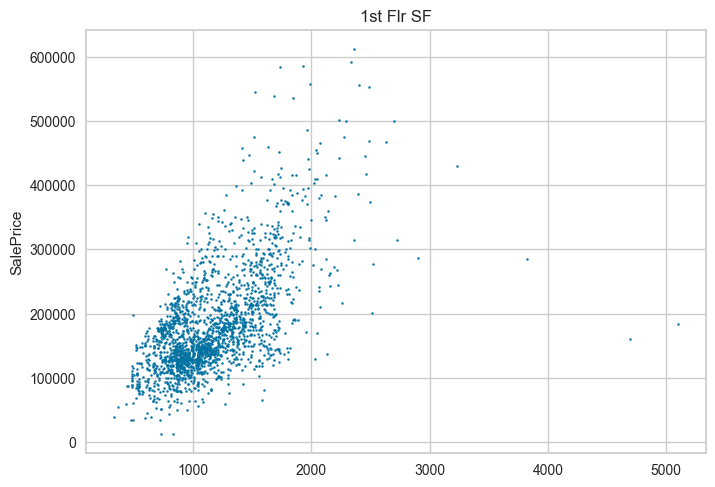

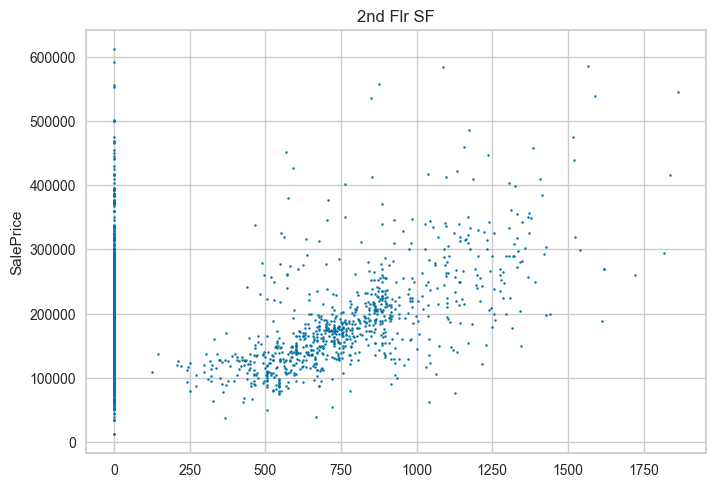

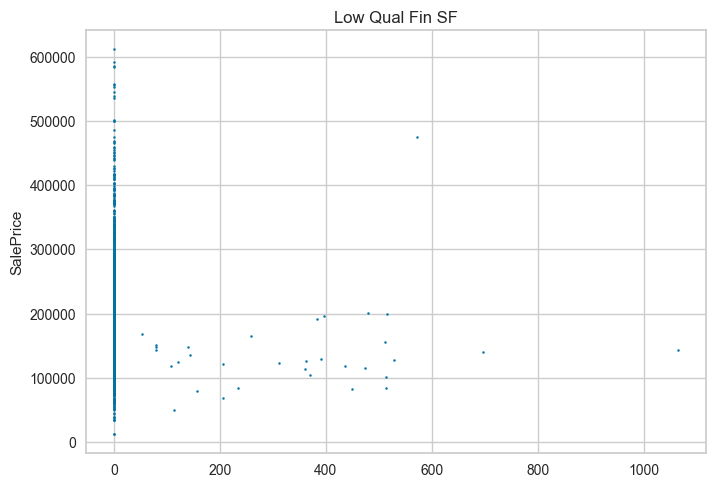

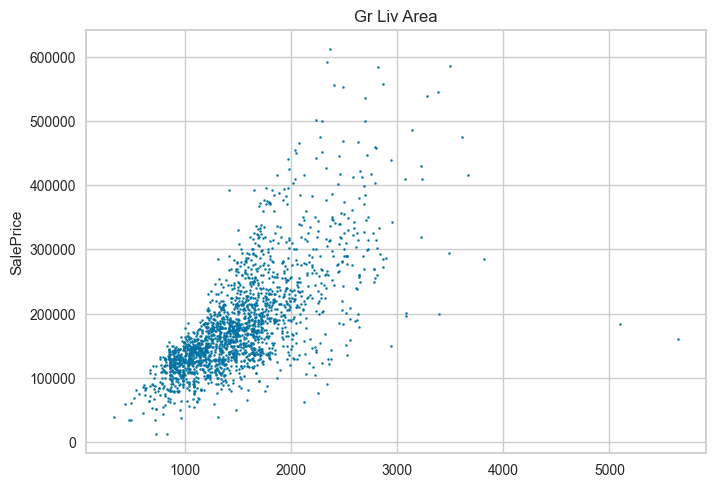

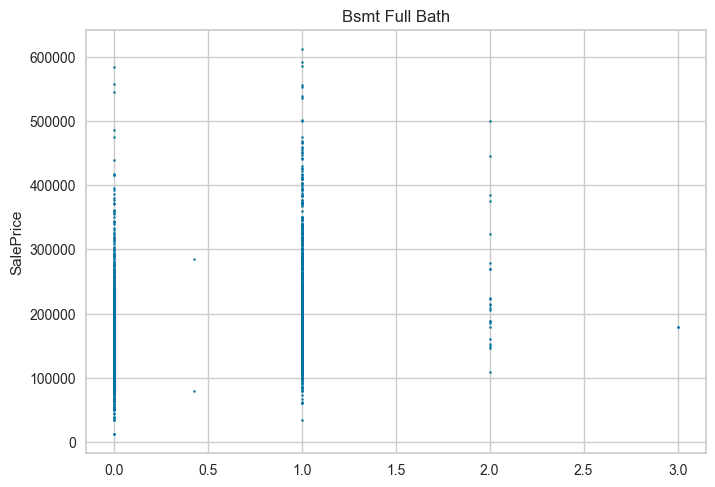

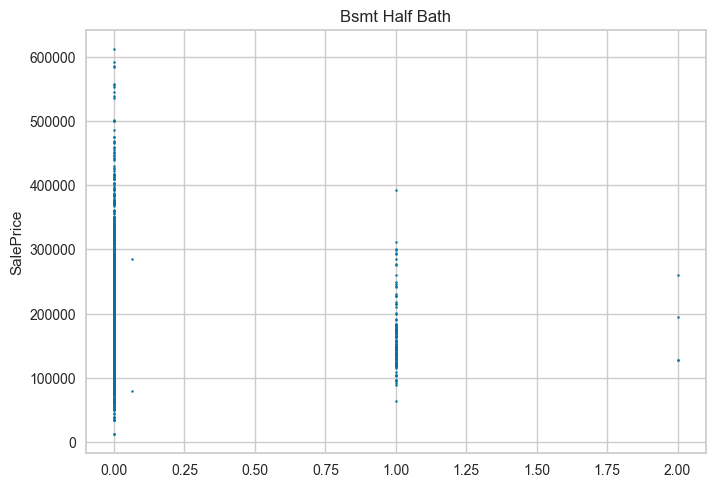

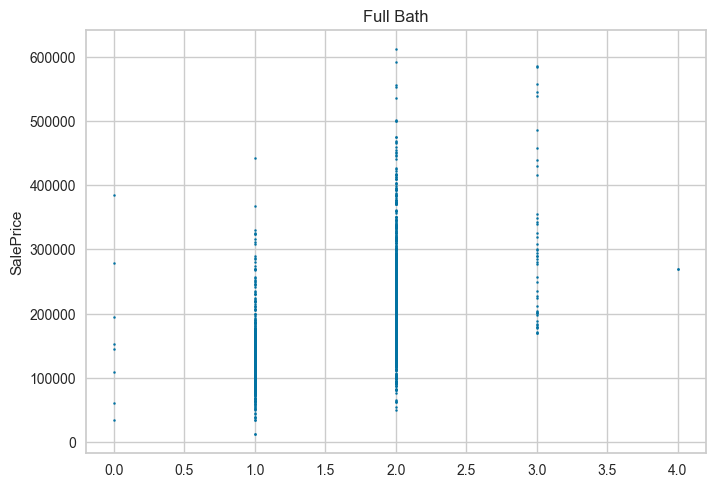

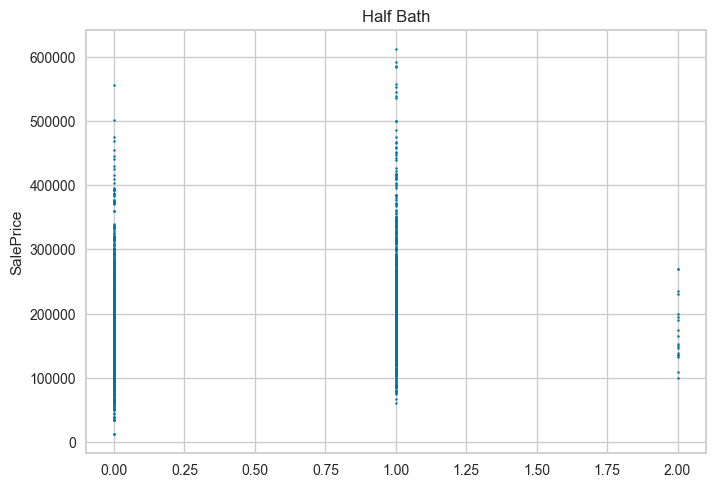

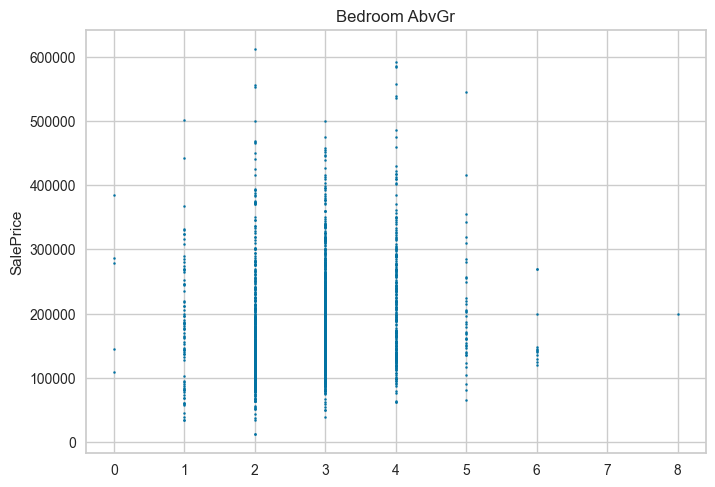

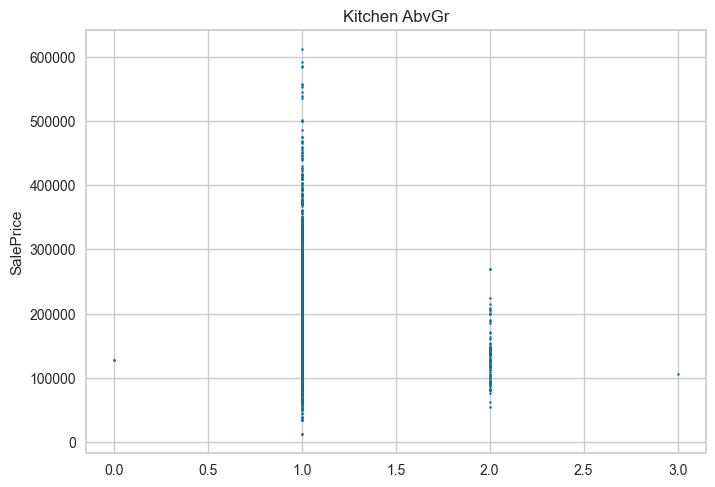

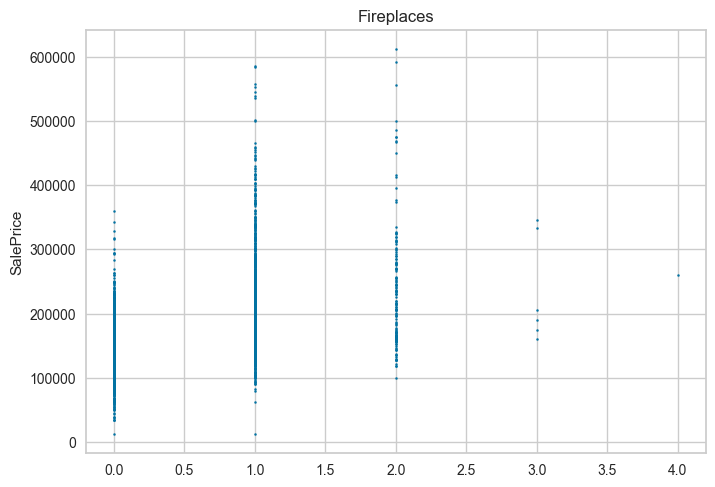

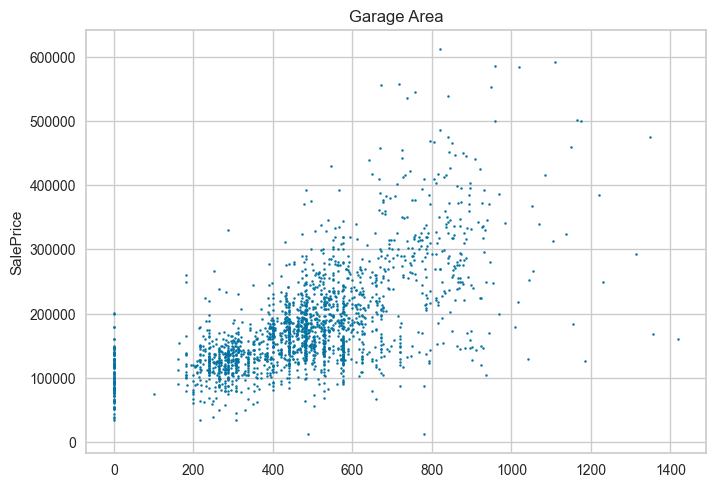

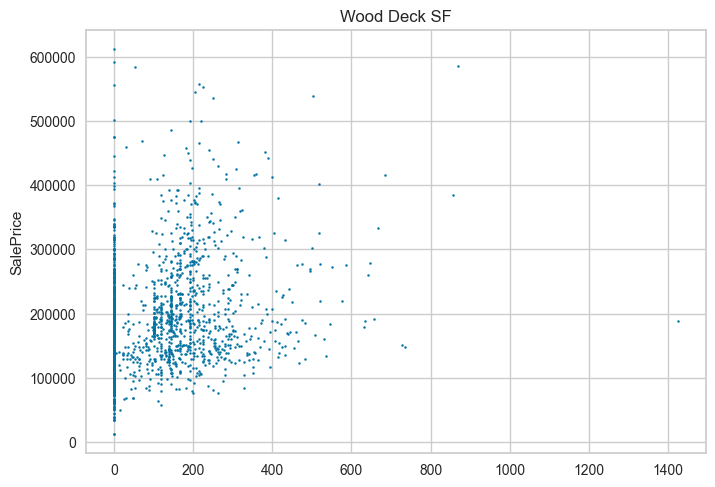

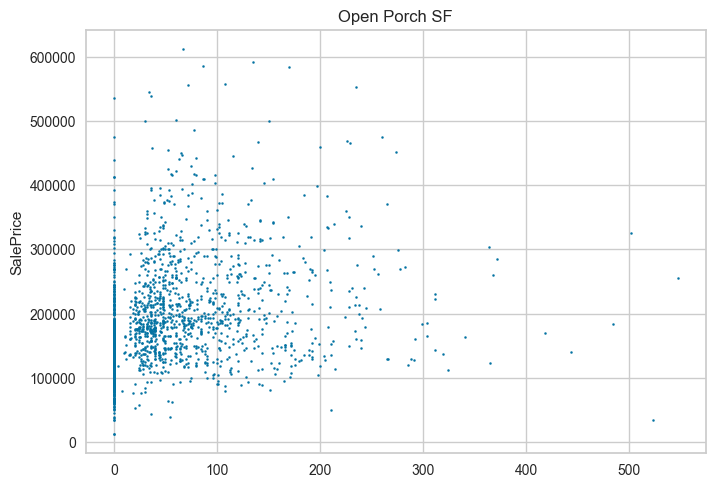

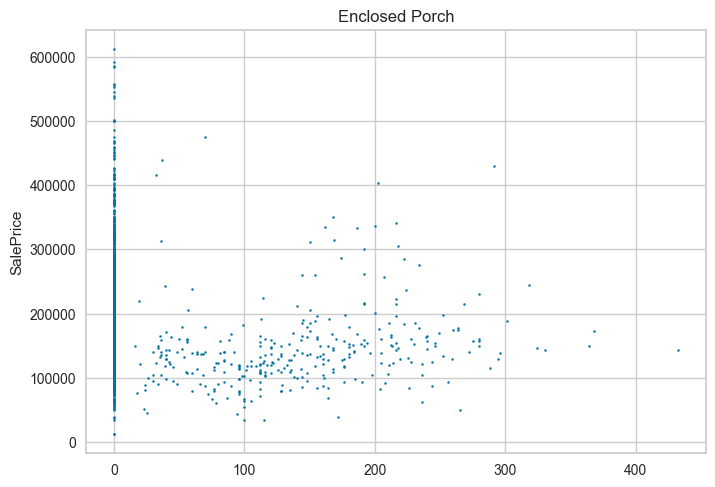

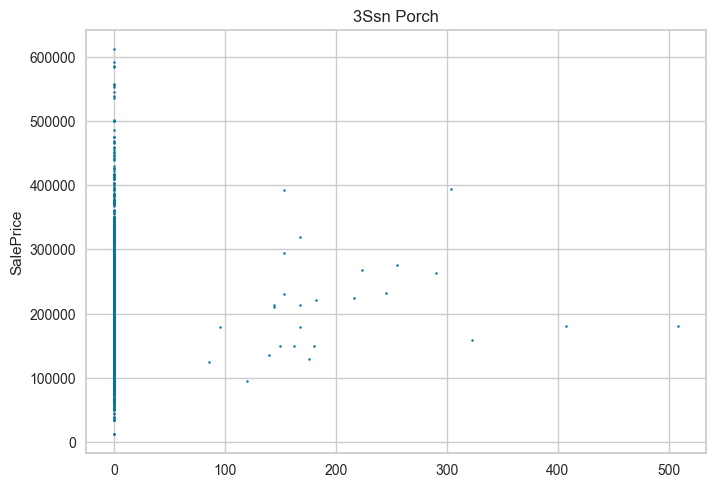

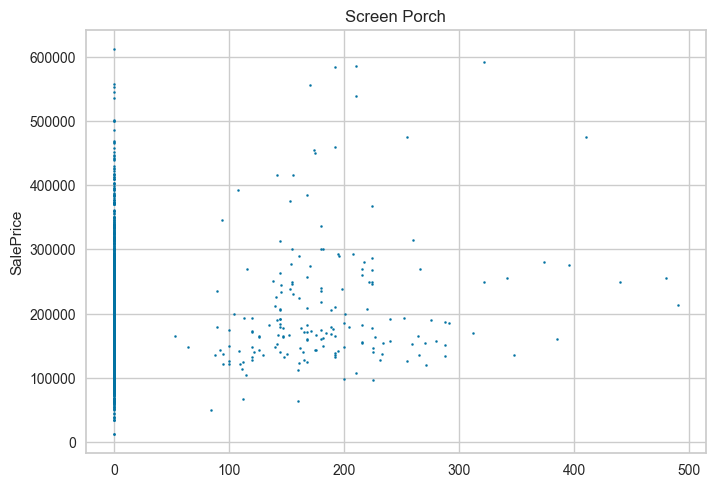

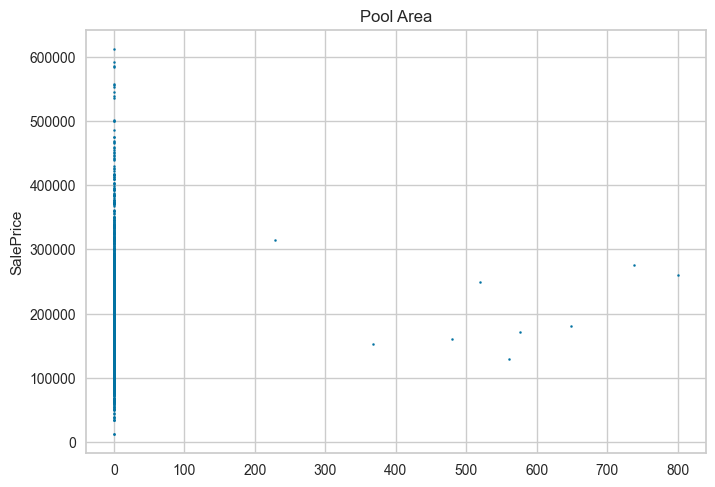

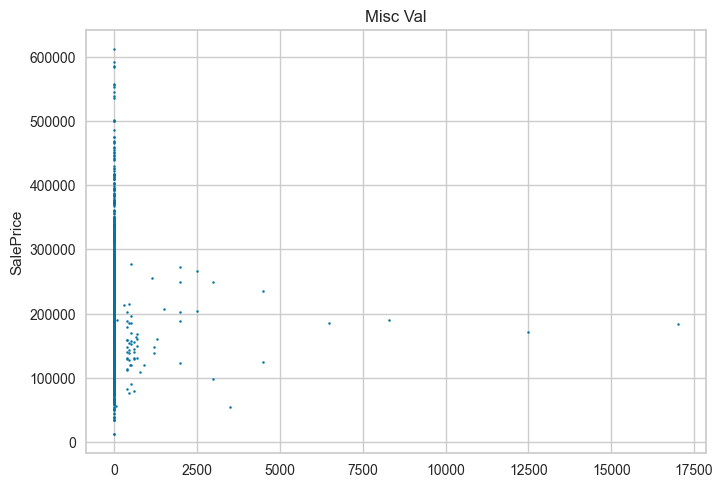

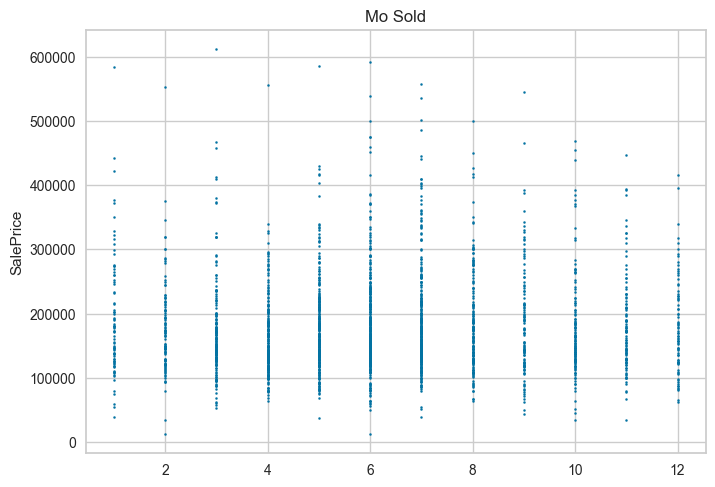

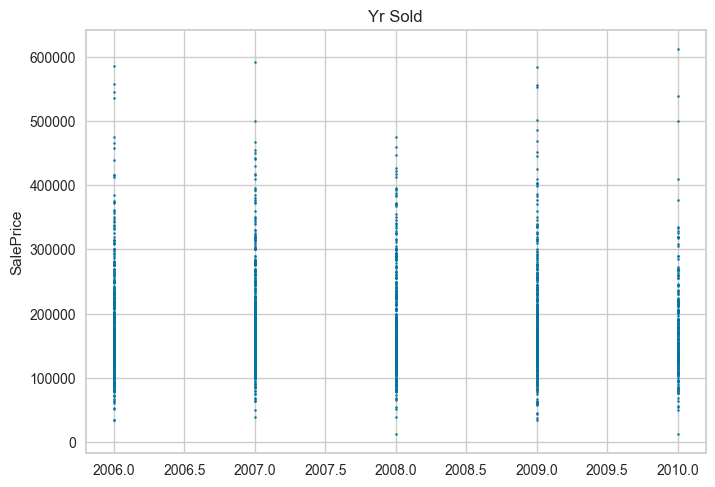

In [35]:
for col in numerical_features_cleaned[:-1]:
    plt.scatter(df_cleaned[col], df_cleaned['SalePrice'], s = 2)
    plt.title(col)
    plt.ylabel('SalePrice')
    plt.show()

In [36]:
# Make use of the 6 sigma methodology where there should be less than 3.4 occurence of such outliers per million. Hence, only means that it is more likely due to special circumstances of a unique house situation
upper_outlier = df_cleaned[numerical_features_cleaned].mean() + df_cleaned[numerical_features_cleaned].std() * 6
lower_outlier = df_cleaned[numerical_features_cleaned].mean() - df_cleaned[numerical_features_cleaned].std() * 6

In [37]:
outliers_to_drop = []
for col in numerical_features_cleaned[:-1]:
    outliers_to_drop.extend(df_cleaned.index[df_cleaned[col]>upper_outlier[col]])
    outliers_to_drop.extend(df_cleaned.index[df_cleaned[col]<lower_outlier[col]])
print(outliers_to_drop)

[471, 694, 960, 1335, 471, 694, 745, 823, 960, 1052, 1843, 1854, 1964, 1409, 1885, 960, 1885, 32, 223, 384, 770, 793, 835, 841, 1166, 1174, 1313, 1395, 1692, 616, 960, 1885, 320, 356, 382, 497, 828, 858, 1026, 1035, 1234, 1239, 1333, 1419, 1433, 1563, 1640, 1688, 1756, 1961, 2042, 960, 1885, 761, 1137, 1280, 1519, 858, 1359, 966, 1692, 974, 1141, 1309, 1885, 828, 79, 144, 218, 335, 429, 892, 1142, 1219, 1346, 1577, 1696, 1739, 1903, 1926, 2028, 2045, 52, 113, 974, 1035, 1357, 1908, 1947, 52, 657, 761, 960, 1130, 1249, 1635, 1875, 304, 380, 700, 765, 1225, 1786, 1885]


In [38]:
#remove row where saleprice is more than 400k and year built is less than 1940
outliers_to_drop.extend(df_cleaned.index[(df_cleaned['SalePrice']>400000) & (df_cleaned['Year Built']<1940)])
outliers_to_drop = list(set(outliers_to_drop))
len(outliers_to_drop)

86

## Perform similar cleaning on test.csv (df_submit_org) data

In [39]:
def match_columns(target_df, train_df):
    #check for columns that appear in train df, but did not appear in target df
    missing_cols_test = set(train_df.columns) - set(target_df.columns)
    #add these columns to test data
    for c in missing_cols_test:
        target_df.loc[:,c] = 0

    #check for columns that appear in target df, but did not appear in train df
    missing_cols_test = set(target_df.columns) - set(train_df.columns)
    #drop these columns from test data
    for c in missing_cols_test:
        target_df.drop(c, axis = 1, inplace = True)
    
    #reorder the column in the test df to be same as train df
    try:
        #try the following
        target_df = target_df[train_df.drop('SalePrice', axis = 1).columns]
    except:
        #if got Saleprice not in the df, the above should error, then we run the following assuming there's no saleprice columns
        target_df = target_df[train_df.columns]
        
    return target_df

In [40]:
# Function to perform the following similar to what we did for df_org dataframe
# - resolve numerical values that are null
# - resolve categorical values that are null


def basic_cleaning(target_df, train_df):
    
    #Numerical features
    # drop unnecessary id data
    target_df = target_df.drop(['Id','PID'], axis = 1)

    #fit imputer model for 'Lot Frontage'
    temp_df = it_imp_lot_frontage.transform(target_df[['Lot Area', 'Lot Frontage']])
    temp_df = pd.DataFrame(temp_df, columns = ['Lot Area', 'Lot Frontage'])
    target_df['Lot Frontage'] = temp_df['Lot Frontage']
    
    #fit imputer model for 'Garage Yr Blt'
    temp_df = it_imp_garage_yr.transform(target_df[['Year Built', 'Garage Yr Blt']])
    temp_df = pd.DataFrame(temp_df, columns = ['Year Built', 'Garage Yr Blt'])
    target_df['Garage Yr Blt'] = temp_df['Garage Yr Blt']

    #fit mean for other missing values
    #remove 'SalePrice' from numerical features
    temp_numerical_features = numerical_features[:-1]
    temp_df = simp_imp.transform(target_df.loc[:,temp_numerical_features])
    target_df.loc[:,temp_numerical_features] = pd.DataFrame(temp_df, columns = target_df.loc[:,temp_numerical_features].columns)
    
    #Categorical features
    #fillna for category data
    target_df[categorical_features] = target_df[categorical_features].fillna('0')
    
    #Match columns
    target_df = match_columns(target_df, train_df)
    
#     #fit model for 'Mas Vnr Area'
#     for i in target_df['Mas Vnr Area'][target_df['Mas Vnr Area'].isnull()].index:
#         target_df_clean_mas_vnr_area = target_df.drop(['Mas Vnr Area'], axis = 1)
#         X_train_pt_mas_vnr_area = pd.DataFrame(pt_x.transform(target_df_clean_mas_vnr_area.iloc[[i]]), columns = target_df_clean_mas_vnr_area.columns)
#         mas_vnr_area = lasso_cv_selected.predict(X_train_pt_mas_vnr_area)
#         mas_vnr_area = pd.DataFrame(mas_vnr_area, columns = ['Mas Vnr Area'])
#         mas_vnr_area = pt_y.inverse_transform(mas_vnr_area)
#         target_df.loc[i, 'Mas Vnr Area'] = mas_vnr_area[0]

    #remove high correlation features
    target_df = target_df.drop(high_corr_features, axis = 1)
    
    #change 'Ms SubClass' to str type
    target_df['MS SubClass'] = target_df['MS SubClass'].astype(str)

    return target_df

In [41]:
df_submit_cleaned = basic_cleaning(df_submit_org, df_org)

In [42]:
df_submit_cleaned.isnull().sum().sort_values(ascending=False)

MS SubClass        0
Bsmt Full Bath     0
Kitchen Qual       0
Kitchen AbvGr      0
Bedroom AbvGr      0
Half Bath          0
Full Bath          0
Bsmt Half Bath     0
Gr Liv Area        0
Fireplaces         0
Low Qual Fin SF    0
2nd Flr SF         0
1st Flr SF         0
Electrical         0
Central Air        0
Heating QC         0
Functional         0
Garage Type        0
MS Zoning          0
Screen Porch       0
Yr Sold            0
Mo Sold            0
Misc Val           0
Misc Feature       0
Fence              0
Pool Area          0
3Ssn Porch         0
Garage Finish      0
Enclosed Porch     0
Open Porch SF      0
Wood Deck SF       0
Paved Drive        0
Garage Cond        0
Garage Area        0
Heating            0
Bsmt Unf SF        0
BsmtFin SF 2       0
Lot Config         0
House Style        0
Bldg Type          0
Condition 2        0
Condition 1        0
Neighborhood       0
Land Slope         0
Utilities          0
BsmtFin Type 2     0
Land Contour       0
Lot Shape    

In [43]:
df_submit_cleaned

MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley Lot Shape  \
0           190        RM     69.000000    9142.0   Pave  Grvl       Reg   
1            90        RL     69.160621    9662.0   Pave     0       IR1   
2            60        RL     58.000000   17104.0   Pave     0       IR1   
3            30        RM     60.000000    8520.0   Pave     0       Reg   
4            20        RL     68.727553    9500.0   Pave     0       IR1   
..          ...       ...           ...       ...    ...   ...       ...   
873          60        RL     80.000000    8000.0   Pave     0       Reg   
874          60        RL     90.000000   14670.0   Pave     0       Reg   
875          20        RL     55.000000    8250.0   Pave     0       Reg   
876          20        RL     60.000000    9000.0   Pave     0       Reg   
877          20        RL     70.000000    8400.0   Pave     0       Reg   

    Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1  \
0            Lvl    AllPub     Inside        Gtl      OldTown        Norm   
1            Lvl    AllPub     Inside        Gtl       Sawyer        Norm   
2            Lvl    AllPub     Inside        Gtl      Gilbert        Norm   
3            Lvl    AllPub     Inside        Gtl      OldTown        Norm   
4            Lvl    AllPub     Inside        Gtl        NAmes        Norm   
..           ...       ...        ...        ...          ...         ...   
873          Lvl    AllPub     Inside        Gtl       NWAmes        PosN   
874          Lvl    AllPub     Inside        Gtl        NAmes        Norm   
875          Lvl    AllPub     Inside        Gtl       Sawyer       Feedr   
876          Lvl    AllPub        FR2        Gtl        NAmes        Norm   
877          Lvl    AllPub     Corner        Gtl        NAmes        Norm   

    Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  Year Built  \
0          Norm    2fmCon      2Story           6.0           8.0      1910.0   
1          Norm    Duplex      1Story           5.0           4.0      1977.0   
2          Norm      1Fam      2Story           7.0           5.0      2006.0   
3          Norm      1Fam      1Story           5.0           6.0      1923.0   
4          Norm      1Fam      1Story           6.0           5.0      1963.0   
..          ...       ...         ...           ...           ...         ...   
873        Norm      1Fam      2Story           6.0           6.0      1974.0   
874        Norm      1Fam      2Story           6.0           7.0      1966.0   
875        Norm      1Fam      1Story           5.0           5.0      1968.0   
876        Norm      1Fam      1Story           4.0           6.0      1971.0   
877        Norm      1Fam      1Story           5.0           5.0      1955.0   

     Year Remod/Add Roof Style Roof Matl Exterior 1st Mas Vnr Type  \
0            1950.0      Gable   CompShg      AsbShng         None   
1            1977.0      Gable   CompShg      Plywood         None   
2            2006.0      Gable   CompShg      VinylSd         None   
3            2006.0      Gable   CompShg      Wd Sdng         None   
4            1963.0      Gable   CompShg      Plywood      BrkFace   
..              ...        ...       ...          ...          ...   
873          1974.0      Gable   CompShg      HdBoard         None   
874          1999.0      Gable   CompShg      VinylSd      BrkFace   
875          1968.0        Hip   CompShg      HdBoard         None   
876          1971.0      Gable   CompShg      HdBoard         None   
877          1955.0      Gable   CompShg      MetalSd         None   

     Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual Bsmt Cond  \
0             0.0         TA         Fa      Stone        Fa        TA   
1             0.0         TA         TA     CBlock        Gd        TA   
2             0.0         Gd         TA      PConc        Gd        Gd   
3             0.0         Gd         TA     CBlock      

## Other useful functions

In [44]:
def remove_unrecorded_value_from_test_df(target_df, compare_df):
    #compare the 2 df and change the cell value from the target df to one that is the most common value in the column
    val_overwritten = 0
    for feature in categorical_features:
        target_unq = set(target_df[feature])
        compare_unq = set(compare_df[feature])
        unrecorded_val = target_unq - target_unq.intersection(compare_unq)
        
        #most common value
        common_val = target_df[feature].value_counts().index[0]
        
        for val in unrecorded_val:
            val_overwritten += len(target_df[feature][target_df[feature]== val])
            target_df[feature][target_df[feature]== val] = common_val
    
        print(feature, val_overwritten)
    return target_df    

In [45]:
def predict_submit(model, test_df, test_df_original, filename):
    #predict y value
    try:
        # we run this for gridsearchcv or normal sklearn regression
        predictions = model.predict(test_df)
        #zip the predictions with respective id and save to designated filename
        df_to_submit = zip(test_df_original['Id'],predictions)
    except:
        #we run this for pycaret model
        predictions = predict_model(model, data=test_df)
        #zip the predictions with respective id and save to designated filename
        df_to_submit = zip(test_df_original['Id'],predictions['Label'])
        
    #dataframe it, sort and save to csv file in specified name
    df_to_submit = pd.DataFrame(df_to_submit, columns = ['Id', 'SalePrice']).sort_values(by='Id')
    df_to_submit.to_csv(path_or_buf = filename+'.csv', index=False)
    
    print(f"{filename}.csv has been saved in {os.getcwd()}")

# Exploratory Data Analysis

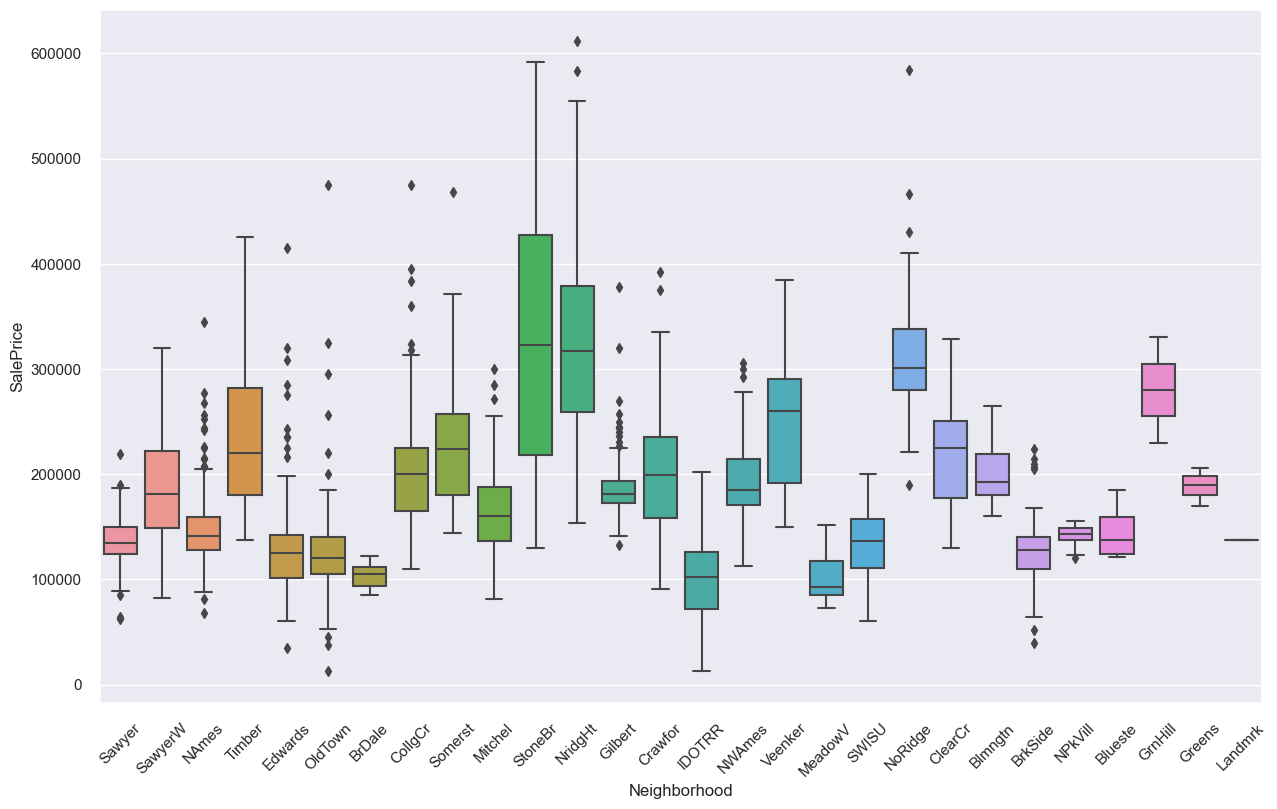

In [46]:
sns.set(rc={'figure.figsize':(15,9)})
sns.boxplot(x=df_cleaned['Neighborhood'], y = df_cleaned['SalePrice'])
plt.xticks(rotation=45);

Natural instint is that location has a lot of correlation on the neighborhood and as seen in our box plot, we confirmed our instinct. Different neighborhood such as `GrnHill` and `Greens` exhibit very different sales 

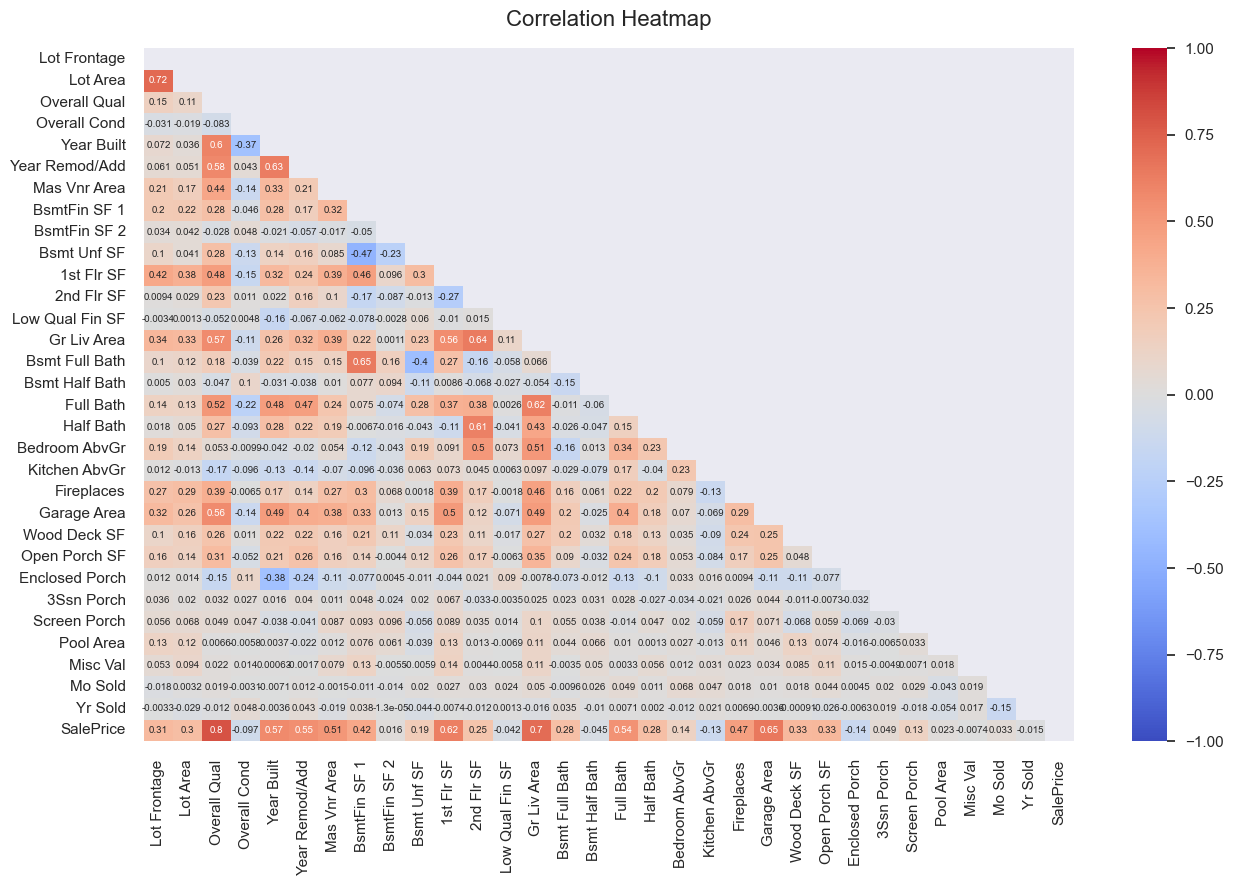

In [47]:
mask = np.triu(np.ones_like(df_cleaned.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_cleaned.corr(), mask=mask, vmin=-1, vmax=1, annot=True, annot_kws={"fontsize":7}, cmap='coolwarm')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':16}, pad=16);

The correlation graph shows the the following numerical features has the highest correlation to Sale Price
- Overall Quality
- 1st Floor Square Foot
- Ground Living Area
- Garage Area

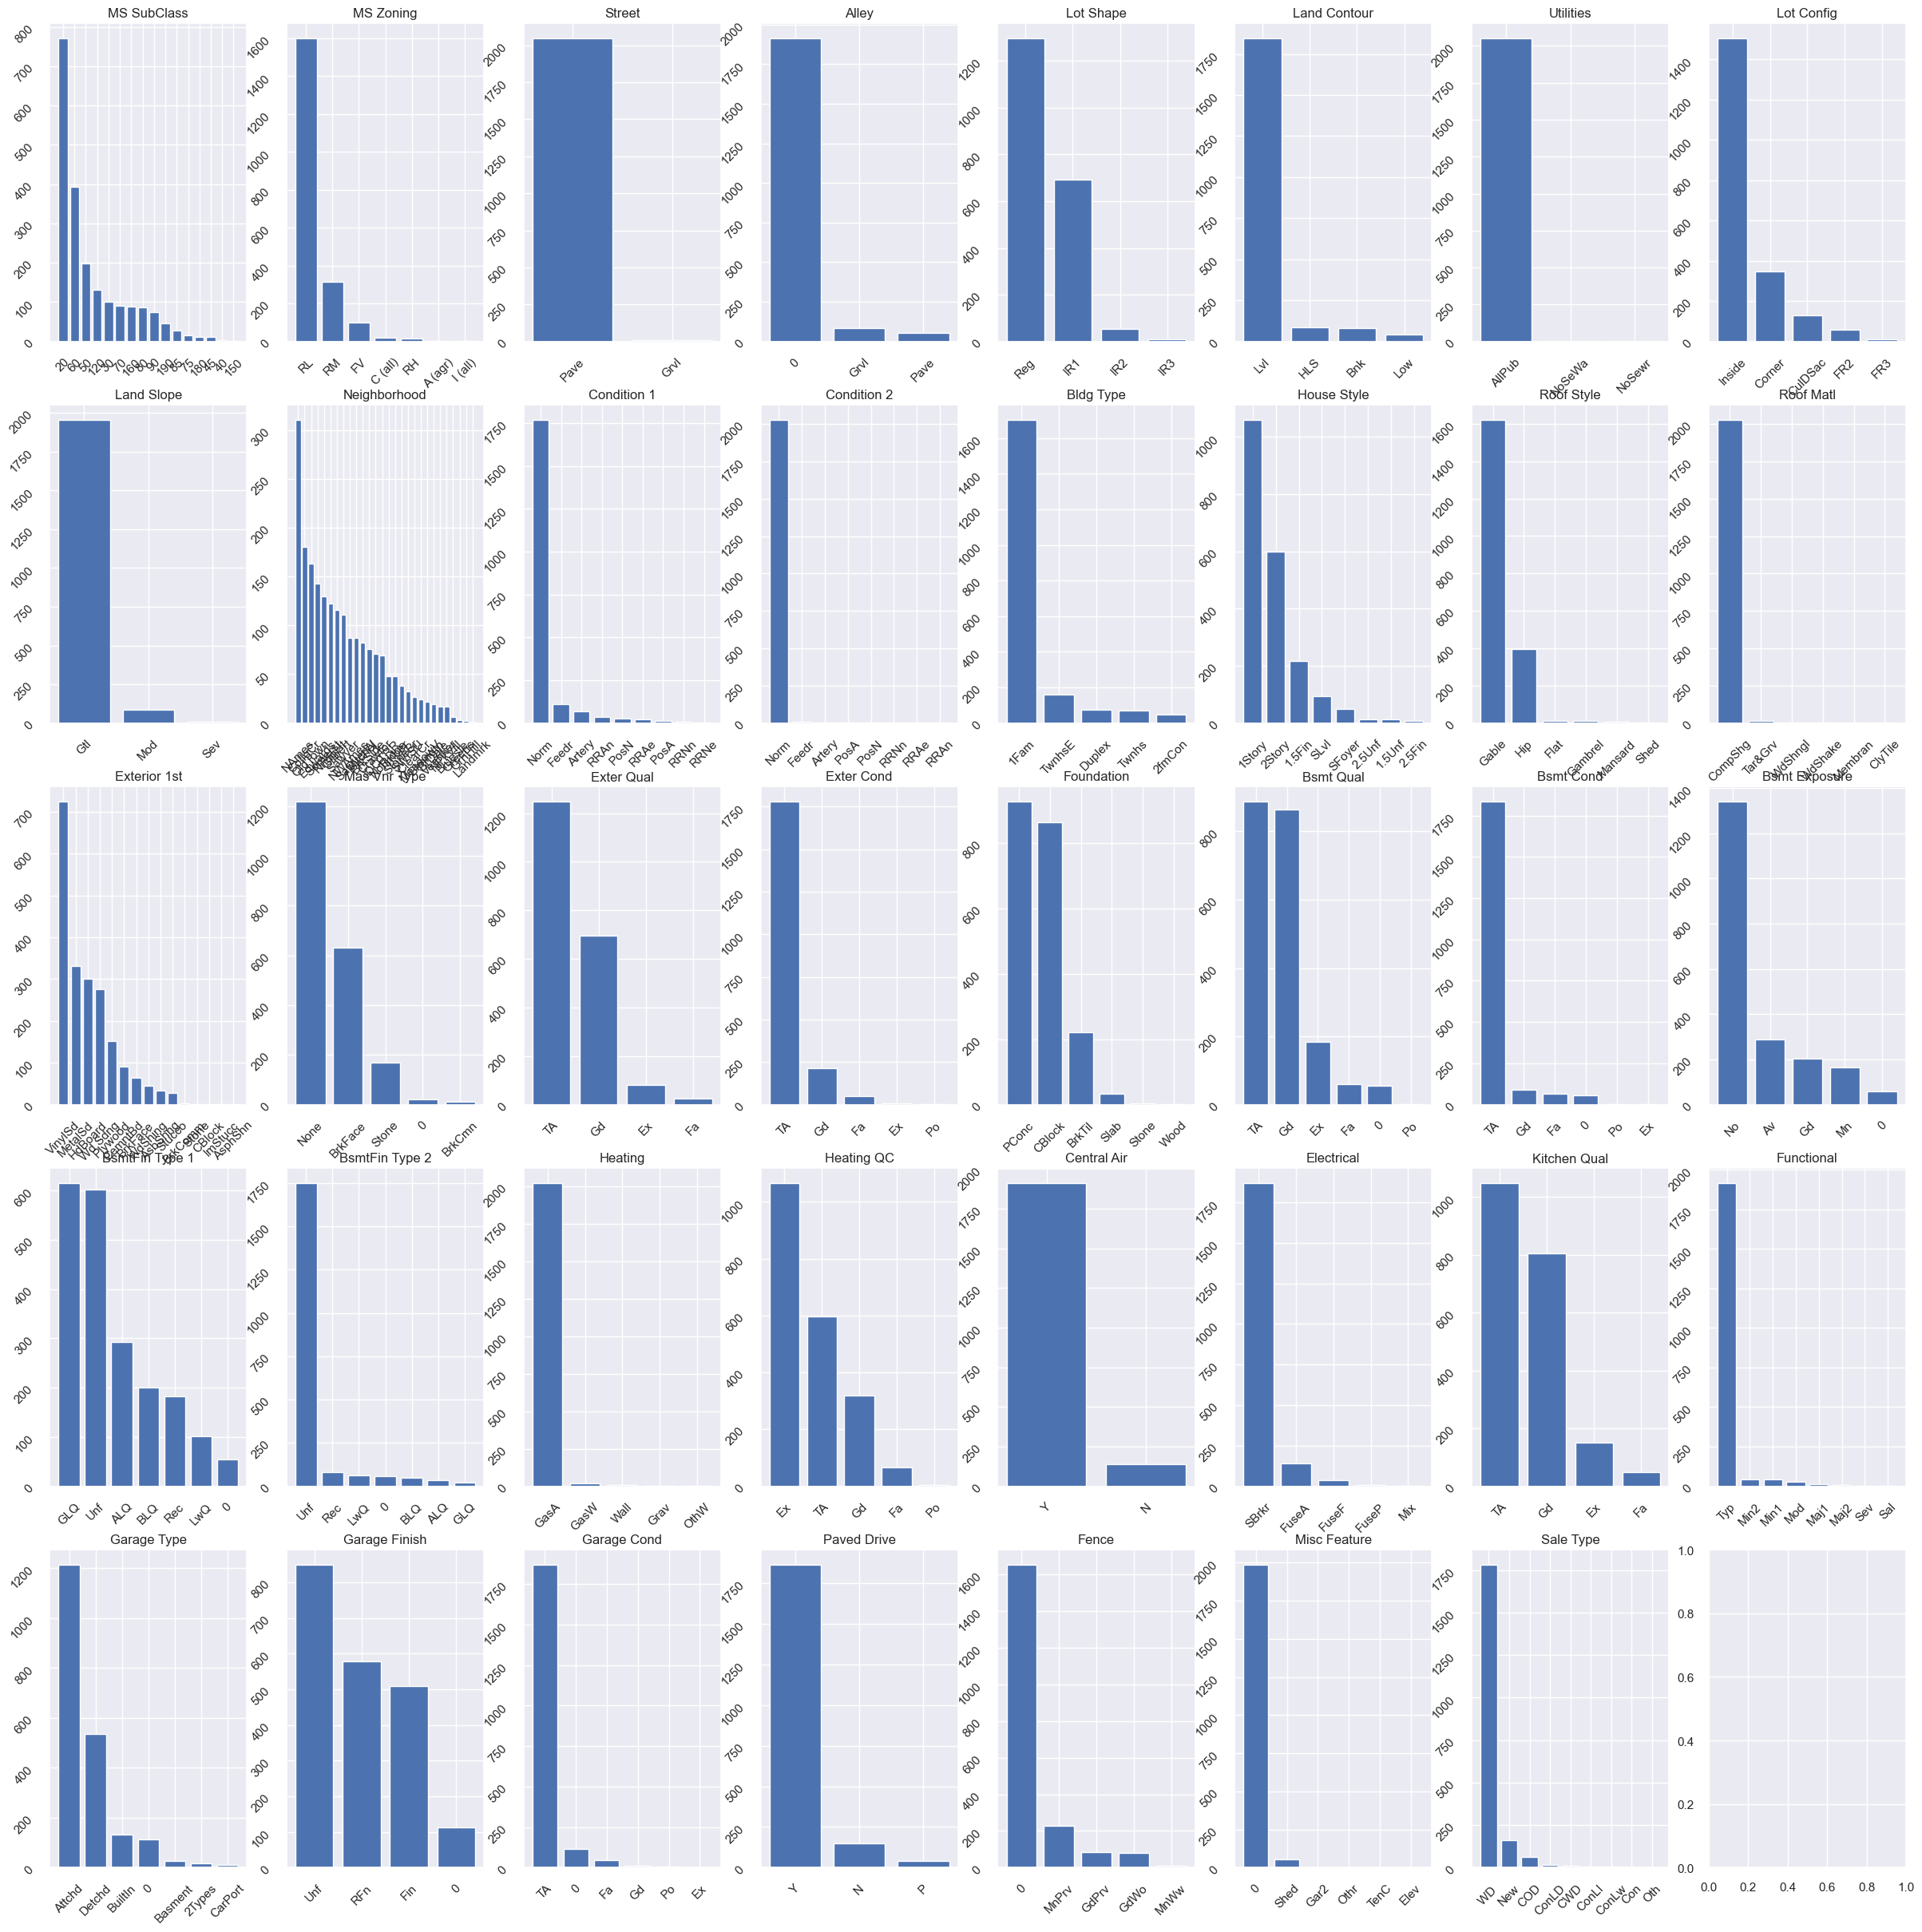

In [48]:
cat = 0
fig, axs = plt.subplots(5,8, figsize=(30,30))
for i in range(5):
    for j in range(8):
        if cat >= len(categorical_features_cleaned):
            break
        col_to_plot = df_cleaned[categorical_features_cleaned].iloc[:,cat].value_counts()
        axs[i,j].bar(col_to_plot.index, col_to_plot.values)
        axs[i,j].set_title(categorical_features_cleaned[cat])
        axs[i,j].tick_params(labelrotation=45)
        cat += 1

We can see that for most of the categorical features, the data are skewed towards a single selection. For example, Sale Type is overwhelmingly `WD`. This suggest that generally most of the houses in Ames region are built using the same guidelines.

However, there are features that stands out where there are more than 1 overwhelming variables such as 
- Foundation
- House style
This could potentially impact the house prices

Finally, we also see that there are quite varying quality finish of the following areas of the house such as
- Basement
- Garage Finish



In [49]:
oe = OrdinalEncoder()
cat_plot = pd.DataFrame(oe.fit_transform(df_cleaned[categorical_features_cleaned]), columns = categorical_features_cleaned)
cat_plot = pd.concat([cat_plot, df_cleaned['SalePrice']], axis = 1)

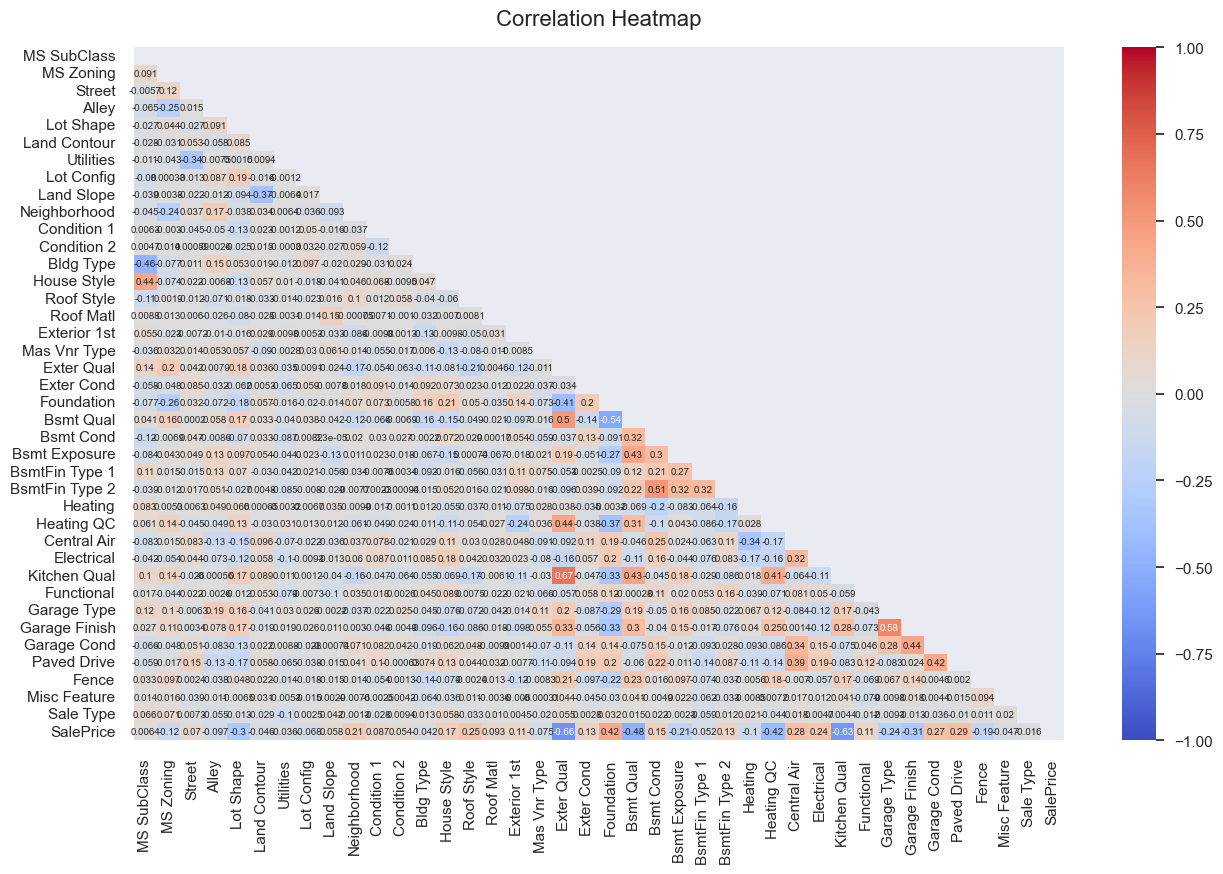

In [50]:
mask = np.triu(np.ones_like(cat_plot.corr(), dtype=np.bool))
heatmap = sns.heatmap(cat_plot.corr(), mask=mask, vmin=-1, vmax=1, annot=True, annot_kws={"fontsize":7}, cmap='coolwarm')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':16}, pad=16);

The correlation graph shows the the following categorical features has the highest correlation to Sale Price
- External Quality
- Kitchen Quality

In [52]:
df_cleaned

Lot Frontage  Lot Area  Overall Qual  Overall Cond  Year Built  \
0        79.466028   13517.0           6.0           8.0      1976.0   
1        43.000000   11492.0           7.0           5.0      1996.0   
2        68.000000    7922.0           5.0           7.0      1953.0   
3        73.000000    9802.0           5.0           5.0      2006.0   
4        82.000000   14235.0           6.0           8.0      1900.0   
...            ...       ...           ...           ...         ...   
2046     79.000000   11449.0           8.0           5.0      2007.0   
2047     76.324951   12342.0           4.0           5.0      1940.0   
2048     57.000000    7558.0           6.0           6.0      1928.0   
2049     80.000000   10400.0           4.0           5.0      1956.0   
2050     60.000000    7500.0           7.0           5.0      1999.0   

      Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  \
0             2005.0         289.0         533.0           0.0        192.0   
1             1997.0         132.0         637.0           0.0        276.0   
2             2007.0           0.0         731.0           0.0        326.0   
3             2007.0           0.0           0.0           0.0        384.0   
4             1993.0           0.0           0.0           0.0        676.0   
...              ...           ...           ...           ...          ...   
2046          2007.0           0.0        1011.0           0.0        873.0   
2047          1950.0           0.0         262.0           0.0        599.0   
2048          1950.0           0.0           0.0           0.0        896.0   
2049          1956.0           0.0         155.0         750.0        295.0   
2050          1999.0           0.0           0.0           0.0        994.0   

      1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  \
0          725.0       754.0              0.0       1479.0             0.0   
1          913.0      1209.0              0.0       2122.0             1.0   
2         1057.0         0.0              0.0       1057.0             1.0   
3          744.0       700.0              0.0       1444.0             0.0   
4          831.0       614.0              0.0       1445.0             0.0   
...          ...         ...              ...          ...             ...   
2046      1728.0         0.0              0.0       1728.0             1.0   
2047       861.0         0.0              0.0        861.0             0.0   
2048      1172.0       741.0              0.0       1913.0             0.0   
2049      1200.0         0.0              0.0       1200.0             1.0   
2050      1028.0       776.0              0.0       1804.0             0.0   

      Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  Kitchen AbvGr  \
0                0.0        2.0        1.0            3.0            1.0   
1                0.0        2.0        1.0            4.0            1.0   
2                0.0        1.0        0.0            3.0            1.0   
3                0.0        2.0        1.0            3.0            1.0   
4                0.0        2.0        0.0            3.0            1.0   
...              ...        ...        ...            ...            ...   
2046             0.0        2.0        0.0            3.0            1.0   
2047             0.0        1.0        0.0            1.0            1.0   
2048             0.0        1.0        1.0            3.0            1.0   
2049             0.0        1.0        0.0            3.0            1.0   
2050             0.0        2.0        1.0            3.0            1.0   

      Fireplaces  Garage Area  Wood Deck SF  Open Porch SF  Enclosed Porch  \
0            0.0        475.0           0.0           44.0             0.0   
1            1.0        559.0           0.0           74.0             0.0   
2            0.0        246.0           0.0           52.0             0.0   
3            0.0        400.0 

<AxesSubplot:xlabel='Mo Sold', ylabel='SalePrice'>

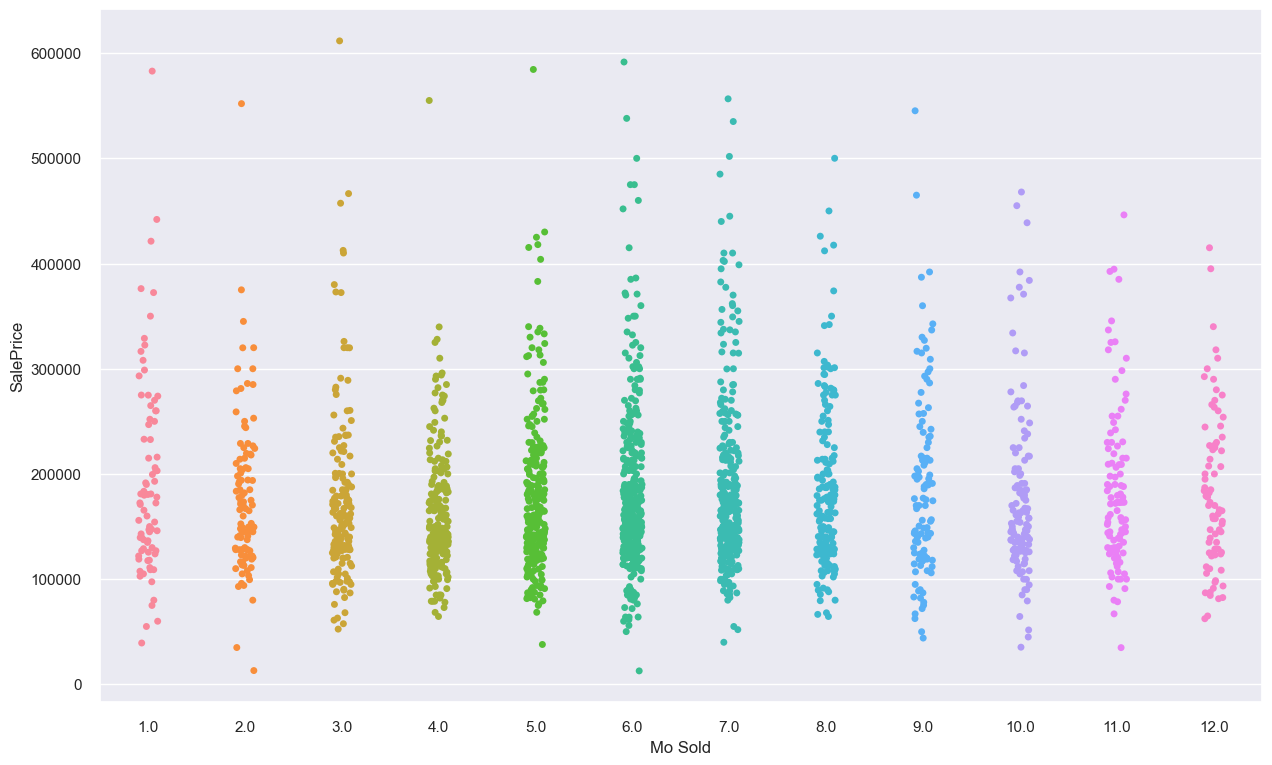

In [55]:
sns.stripplot(data = df_cleaned, x = "Mo Sold", y = 'SalePrice', orient = "v")

Suprisingly the graph shows that through months May to July, there's relatively higher houses sold compared to the rest of the months. In addition, there's sign that the highest saleprice of the month actually dropped throughout the months till December

# Activate MLFlow

In [51]:
# Run the following in another notebook
# Start the MLFlow UI
#! mlflow ui --backend-store-uri sqlite:///mlflow.db

In [52]:
import mlflow 
mlflow.set_tracking_uri("sqlite:///mlflow.db") 
mlflow.set_experiment("GA-dsi32-project-2") 
# Start automatically logging all runs below to the created MLFlow experiment
mlflow.autolog(exclusive=False)

2022/09/26 16:25:28 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2022/09/26 16:25:28 INFO mlflow.tracking.fluent: Autologging successfully enabled for lightgbm.
2022/09/26 16:25:29 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


# Baseline Model

In [53]:
# We use onehotencoding (ohe) from sklean instead of get_dummies from pandas because ohe allow is able to recognise columns that does not appear during fit and then add additional columns during ohe
# https://albertum.medium.com/preprocessing-onehotencoder-vs-pandas-get-dummies-3de1f3d77dcc
ohe = OneHotEncoder(handle_unknown = 'ignore')

X = pd.DataFrame(ohe.fit_transform(df_cleaned[categorical_features_cleaned]).toarray(), columns = ohe.get_feature_names(categorical_features_cleaned))
X = pd.concat([df_cleaned[numerical_features_cleaned].drop('SalePrice', axis = 1), X], axis = 1)
y = df_cleaned['SalePrice']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [55]:
lr_baseline = LinearRegression()
lr_baseline.fit(X_train, y_train)
y_pred = lr_baseline.predict(X_test)

with mlflow.start_run():
    baseline_train_r2 = lr_baseline.score(X_train, y_train)
    baseline_test_r2 = lr_baseline.score(X_test, y_test)
    baseline_cv_r2 = cross_val_score(lr_baseline, X_train, y_train).mean()

print(f"""Baseline R2 score for train data: {baseline_train_r2}
Baseline R2 score for test data: {baseline_test_r2}, 
Baseline cross validated R2 score for train data: {baseline_cv_r2}""")

## for further checks in future. The warning signal is linked to us using one hot encoder for categorical data. However, am unable to pinpoint what causes this. We put this on the backburner as we are still able to download and run the model from mlflow

2022/09/26 16:25:29 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'aae04384ba3f4174aaf866cb9662b902', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2022/09/26 16:25:34 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under ./mlruns/1/aae04384ba3f4174aaf866cb9662b902/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the tracking store. If logging to a mlflow server via REST, consider upgrading the server version to MLflow 1.7.0 or above.
2022/09/26 16:25:38 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under ./mlruns/1/8e3cc74a0a9845d8a969e4f323f30a00/artifacts. 

Baseline R2 score for train data: 0.944022606701001
Baseline R2 score for test data: -12073281.905235356, 
Baseline cross validated R2 score for train data: -6052502.0509267505


In [56]:
X_submit = pd.DataFrame(ohe.transform(df_submit_cleaned[categorical_features_cleaned]).toarray(), columns = ohe.get_feature_names(categorical_features_cleaned))
X_submit = pd.concat([df_submit_cleaned[numerical_features_cleaned[:-1]], X_submit], axis = 1)

In [57]:
predict_submit(lr_baseline, X_submit, df_submit_org, 'baseline_submission')

baseline_submission.csv has been saved in C:\Users\kyunomi\OneDrive - Singapore Management University\Personal\General Assembly Data Science Immersive Program\my_materials\project_2


## Kaggle Score
- Score: 415522585.39491
- Public score: 649729334.37044

# Exploratory Model Evaluation

## Linear Regression GridSearchCV

In [58]:
# Prepare pipeline to transform categorical and numerical categories first
# https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html
numeric_transformer = Pipeline(
    steps=[("poly", PolynomialFeatures(include_bias = False)),
           ("ss", StandardScaler()),
           ("power", PowerTransformer()),
           ("skbn", SelectKBest(score_func=f_regression))
          ])

categorical_transformer = Pipeline(
    steps=[("ohe", OneHotEncoder(handle_unknown = 'ignore')),
           ("skbc", SelectKBest(score_func=f_classif))
          ])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features_cleaned[:-1]),
        ("cat", categorical_transformer, categorical_features_cleaned)
    ]
)

In [59]:
# include regression method into pipeline
pipe = Pipeline(
    steps=[("preprocessor", preprocessor),
           ("lr", LinearRegression())]
)

In [60]:
pipe_params = {
    'preprocessor__num__poly__degree': [1,2],
    'preprocessor__num__ss': ['passthrough', StandardScaler(with_mean = False), StandardScaler(with_mean = True)],
    'preprocessor__num__power': ['passthrough', PowerTransformer()],
    'preprocessor__num__skbn__k': [0, 2, 4, 8, 16, 31],
    'preprocessor__cat__skbc__k': [0, 4, 5, 10, 20, 39],
    }

In [61]:
pipe_gridsearch = GridSearchCV(pipe,
                               pipe_params,
                               cv = 5,
                               scoring = ['r2', 'neg_root_mean_squared_error'],
                               refit='neg_root_mean_squared_error',
                               verbose = 1,
                               n_jobs = -1)

In [62]:
X = df_cleaned.drop('SalePrice', axis = 1)
y = df_cleaned['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [63]:
pipe_gridsearch.fit(X_train, y_train)

2022/09/26 16:25:53 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'd6e381916df14143b0fae7ca67a7e292', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2022/09/26 16:25:53 WARNING mlflow.utils: Truncated the value of the key `estimator`. Truncated value: `Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures(include_bias=False)),
                                                                  ('ss',
                                                                   StandardScaler()),
                                                                 ...`
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   41.9s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:  3.4min finished
2022/09/26 16:29:23 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under ./mlruns/1/d6e381916df14143b0fae7ca67a7e292/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the tracking store. If logging to a mlflow server via REST, consider upgrading the server version to MLflow 1.7.0 or above.
2022/09/26 16:29:23 INFO mlflow.sklearn.utils: Logging the 5 best r

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('poly',
                                                                                          PolynomialFeatures(include_bias=False)),
                                                                                         ('ss',
                                                                                          StandardScaler()),
                                                                                         ('power',
                                                                                          PowerTransformer()),
                                                                                         ('skbn',
                                                                                          SelectKBest(s

In [64]:
pipe_gridsearch.best_params_

{'preprocessor__cat__skbc__k': 0,
 'preprocessor__num__poly__degree': 2,
 'preprocessor__num__power': 'passthrough',
 'preprocessor__num__skbn__k': 31,
 'preprocessor__num__ss': StandardScaler(with_mean=False)}

In [65]:
pipe_gridsearch.best_score_

-30544.464754293673

In [66]:
pipe_gridsearch.score(X_test, y_test)

-27039.134675982586

In [67]:
pd.DataFrame(pipe_gridsearch.cv_results_).sort_values(by="mean_test_neg_root_mean_squared_error", ascending = False)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
52        0.446406      0.026170         0.022620    6.835565e-03   
53        0.494650      0.052352         0.030027    1.484584e-02   
51        0.438198      0.017764         0.026223    7.788984e-03   
394       0.565514      0.022604         0.018017    1.415662e-03   
391       0.646788      0.044956         0.018617    1.745309e-03   
395       0.562512      0.010649         0.019017    8.951622e-04   
392       0.582530      0.024688         0.019017    1.674937e-03   
390       0.606752      0.048917         0.023221    7.633214e-03   
427       2.317507      0.093478         0.055450    1.357675e-03   
431       2.472047      0.027618         0.043840    1.941145e-03   
429       2.517489      0.089545         0.059454    3.829914e-03   
322       0.674213      0.077317         0.020619    2.418936e-03   
388       0.658398      0.081618         0.019017    1.096410e-03   
319       0.614359      0.049146         0.019618    1.357696e-03   
430       2.309099      0.088807         0.056251    1.069408e-02   
389       0.664004      0.023487         0.024622    8.716440e-03   
375       0.444404      0.020871         0.015414    1.020852e-03   
373       0.463421      0.037903         0.016815    4.121763e-03   
374       0.443403      0.020736         0.016415    1.357647e-03   
372       0.460419      0.024435         0.020218    7.003432e-03   
323       0.573321      0.055992         0.021419    2.942322e-03   
320       0.582329      0.033066         0.030228    1.178172e-02   
425       2.838981      0.099470         0.076469    7.289499e-03   
424       2.378562      0.106745         0.056852    6.342933e-03   
411       0.477034      0.035499         0.016215    1.167733e-03   
412       0.476032      0.037704         0.018417    1.020768e-03   
413       0.489845      0.038974         0.017416    1.357218e-03   
428       2.706861      0.050490         0.070665    5.393782e-03   
423       2.799345      0.145033         0.056852    2.484541e-03   
70        2.369954      0.047953         0.074067    1.929442e-02   
369       0.460819      0.010336         0.019218    4.754055e-03   
370       0.458417      0.033227         0.015814    7.492585e-04   
371       0.485642      0.034227         0.024422    7.947149e-03   
69        2.438617      0.031106         0.068662    1.122780e-02   
426       2.518289      0.025187         0.062257    6.405869e-03   
385       0.664604      0.054282         0.022020    3.035949e-03   
355       2.319709      0.089070         0.062657    4.367498e-03   
321       0.661001      0.025562         0.024022    7.328031e-03   
318       0.614959      0.044724         0.017816    1.722319e-03   
386       0.641984      0.085716         0.024022    6.038771e-03   
366       0.454213      0.025615         0.017816    4.625942e-03   
368       0.476233      0.038979         0.016015    9.536743e-08   
367       0.493248      0.039163         0.019217    5.000273e-03   
67        2.412793      0.133642         0.069863    1.367108e-02   
49        0.470829      0.023186         0.020218    3.489697e-03   
50        0.452612      0.017931         0.031828    1.162834e-02   
48        0.462621      0.026188         0.036233    2.334898e-02   
357       2.469245      0.099971         0.061456    9.487013e-03   
339       0.448608      0.028193         0.019418    2.334497e-03   
340       0.491246      0.052779         0.018417    2.419039e-03   
341       0.482238      0.027669         0.018016    1.096367e-03   
358       2.327916      0.127551         0.063658    1.307485e-02   
305       0.441601      0.017513         0.016415    2.334624e-03   
303       0.451010      0.032369         0.017416    3.829846e-03   
196       0.469026      0.033206         0.017616    2.247053e-03   
197       0.500656      0.031150         0.019217    4.448974e-03   
195       0.460218      0.030103         0.019418    5.431208e-03   
421

In [68]:
predict_submit(pipe_gridsearch, df_submit_cleaned, df_submit_org, 'Linear_Regression_GridSearchCV')

Linear_Regression_GridSearchCV.csv has been saved in C:\Users\kyunomi\OneDrive - Singapore Management University\Personal\General Assembly Data Science Immersive Program\my_materials\project_2


### Kaggle Score
- Score: 26206.54993
- Public score: 31947.93066

This result is significantly better than our baseline model

## Lasso, Ridge, Elastic, Linear GridSearchCV

In [69]:
# Prepare pipeline to transform categorical and numerical categories first
# https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html
numeric_transformer = Pipeline(
    steps=[("poly", PolynomialFeatures(include_bias = False)),
           ("ss", StandardScaler()),
           ("power", PowerTransformer()),
           ("skbn", SelectKBest(score_func=f_regression))
          ])

categorical_transformer = Pipeline(
    steps=[("ohe", OneHotEncoder(handle_unknown = 'ignore')),
           ("skbc", SelectKBest(score_func=f_classif))
          ])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features_cleaned[:-1]),
        ("cat", categorical_transformer, categorical_features_cleaned)
    ]
)

In [70]:
#Instantiate the 4 regression methods

reg0 = LinearRegression()
reg1 = Lasso(max_iter = 5000)
reg2 = Ridge(max_iter = 5000)
reg3 = ElasticNet(max_iter = 5000)

In [71]:
pipe = Pipeline(
    steps=[("preprocessor", preprocessor),
           ("regression", reg0)]
)

In [72]:
# Prepare param for multiple models
#https://towardsdatascience.com/how-to-tune-multiple-ml-models-with-gridsearchcv-at-once-9fcebfcc6c23

#preprocessor parameters
pre_param = {
    'preprocessor__num__poly__degree': [1,2],
    'preprocessor__num__ss': ['passthrough', StandardScaler(with_mean = False), StandardScaler(with_mean = True)],
    'preprocessor__num__power': ['passthrough', PowerTransformer()],
    'preprocessor__num__skbn__k': [0, 2, 8, 31],
    'preprocessor__cat__skbc__k': [0, 4, 10, 39],
    }

#linear regression
param0 = {
    'regression__normalize': [True, False],
    'regression': [reg0]
    }
param0.update(pre_param)

#lasso regression
param1 = {
    'regression__alpha': np.logspace(-3, 3, 5),
    'regression__normalize': [True, False],
    'regression': [reg1]
    }
param1.update(pre_param)

#Ridge regression
param2 = {
    'regression__alpha': np.logspace(0, 5, 5),
    'regression__normalize': [True, False],
    'regression': [reg2]
    }
param2.update(pre_param)

#Elastic regression
param3 = {
    'regression__alpha': np.logspace(-3, 5, 3),
    'regression__l1_ratio': np.linspace(0.1, 0.9, 3),
    'regression__normalize': [True, False],
    'regression': [reg3]
    }
param3.update(pre_param)

multipipe_params = [param0, param1, param2, param3]

In [73]:
multi_pipe_gridsearch = GridSearchCV(pipe,
                                     multipipe_params,
                                     cv = 5,
                                     scoring = ['r2', 'neg_root_mean_squared_error'],
                                     refit = 'neg_root_mean_squared_error',
                                     verbose = 1,
                                     n_jobs = -1)

In [74]:
X = df_cleaned.drop('SalePrice', axis = 1)
y = df_cleaned['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [75]:
multi_pipe_gridsearch.fit(X_train, y_train)

2022/09/26 16:29:26 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '1d3ab9a2b2f048cba47788ca6d708a2c', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2022/09/26 16:29:26 WARNING mlflow.utils: Truncated the value of the key `estimator`. Truncated value: `Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures(include_bias=False)),
                                                                  ('ss',
                                                                   StandardScaler()),
                                                                 ...`
2022/09/26 16:29:26 WARNING mlflow.utils: Truncated the value of the key `param_grid`. Truncated value: `[{'regression__normalize': [

Fitting 5 folds for each of 7680 candidates, totalling 38400 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   31.6s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   56.5s
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 4976 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 6026 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 7176 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 8426 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 9776 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done 11226 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done 12776 tasks      | elapsed: 19

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('poly',
                                                                                          PolynomialFeatures(include_bias=False)),
                                                                                         ('ss',
                                                                                          StandardScaler()),
                                                                                         ('power',
                                                                                          PowerTransformer()),
                                                                                         ('skbn',
                                                                                          SelectKBest(s

In [76]:
multi_pipe_gridsearch.best_params_

{'preprocessor__cat__skbc__k': 39,
 'preprocessor__num__poly__degree': 2,
 'preprocessor__num__power': 'passthrough',
 'preprocessor__num__skbn__k': 31,
 'preprocessor__num__ss': 'passthrough',
 'regression': ElasticNet(alpha=0.001, l1_ratio=0.1, max_iter=5000),
 'regression__alpha': 0.001,
 'regression__l1_ratio': 0.1,
 'regression__normalize': False}

In [77]:
multi_pipe_gridsearch.best_score_

-28545.416475814134

In [78]:
multi_pipe_gridsearch.score(X_test, y_test)

-25191.93428442764

In [79]:
pd.DataFrame(multi_pipe_gridsearch.cv_results_).sort_values(by="mean_test_neg_root_mean_squared_error", ascending = False)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
7411       0.740273      0.040852         0.017216        0.001167   
4077       0.484040      0.038913         0.020619        0.003265   
7429       0.721857      0.032404         0.019017        0.001674   
7447       0.740473      0.021987         0.018216        0.000749   
4085       0.550301      0.030388         0.024222        0.003974   
...             ...           ...              ...             ...   
7513       2.514085      0.019058         0.000000        0.000000   
7514       2.627989      0.109168         0.000000        0.000000   
7515       2.644604      0.051841         0.000000        0.000000   
7516       2.727680      0.054184         0.000000        0.000000   
7517       2.696251      0.069343         0.000000        0.000000   

     param_preprocessor__cat__skbc__k param_preprocessor__num__poly__degree  \
7411                               39                                     2   
4077                               39                                     2   
7429                               39                                     2   
7447                               39                                     2   
4085                               39                                     2   
...                               ...                                   ...   
7513                               39                                     2   
7514                               39                                     2   
7515                               39                                     2   
7516                               39                                     2   
7517                               39                                     2   

     param_preprocessor__num__power param_preprocessor__num__skbn__k  \
7411                    passthrough                               31   
4077                    passthrough                               31   
7429                    passthrough                               31   
7447                    passthrough                               31   
4085                    passthrough                               31   
...                             ...                              ...   
7513             PowerTransformer()                                0   
7514             PowerTransformer()                                0   
7515             PowerTransformer()                                0   
7516             PowerTransformer()                                0   
7517             PowerTransformer()                                0   

          param_preprocessor__num__ss  \
7411                      passthrough   
4077                      passthrough   
7429  StandardScaler(with_mean=False)   
7447                 StandardScaler()   
4085  StandardScaler(with_mean=False)   
...                               ...   
7513                 StandardScaler()   
7514                 StandardScaler()   
7515                 StandardScaler()   
7516                 StandardScaler()   
7517                 StandardScaler()   

                                       param_regression  \
7411  ElasticNet(alpha=0.001, l1_ratio=0.1, max_iter...   
4077                               Ridge(max_iter=5000)   
7429  ElasticNet(alpha=0.001, l1_ratio=0.1, max_iter...   
7447  ElasticNet(alpha=0.001, l1_ratio=0.1, max_iter...   
4085                               Ridge(max_iter=5000)   
...                                                 ...   
7513  ElasticNet(alpha=0.001, l1_ratio=0.1, max_iter...   
7514  ElasticNet(alpha=0.001, l1_ratio=0.1, max_iter...   
7515  ElasticNet(alpha=0.001, l1_ratio=0.1, max_iter...   
7516  ElasticNet(alpha=0.001, l1_ratio=0.1, max_iter...   
7517  ElasticNet(alpha=0.001, l1_ratio=0.1, max_iter...   

     param_regression__normalize param_regression__alpha  \
7411                       False                   0.001   
4077                       Fa

In [80]:
predict_submit(multi_pipe_gridsearch, df_submit_cleaned, df_submit_org, 'Multi_Regression_GridSearchCV')

Multi_Regression_GridSearchCV.csv has been saved in C:\Users\kyunomi\OneDrive - Singapore Management University\Personal\General Assembly Data Science Immersive Program\my_materials\project_2


In [81]:
#calculate improvement over previous kaggle score
1 - 24219.97373/26206.54993

0.07580456814446457

### Kaggle Score
- Score: 24219.97373
- Public score: 30202.73728

Based solely only on score, gridsearch cv over all the different features and the 4 regression model produce a model that has over 7% improvement

## Disable MlFlow autolog

In [82]:
#Turn off mlflow auto logging and make use of pycaret inbuilt mlflow logging as it has less issue
mlflow.autolog(disable=True)

## Pycaret model

In [83]:
from pycaret.regression import *
s = setup(df_cleaned,
          target = 'SalePrice',
          use_gpu = True,
          log_experiment = True,
          experiment_name = 'GA-dsi32-project-2',
          silent = True)

In [84]:
best = compare_models(n_select = 20)

In [85]:
print(best[0])

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=5433, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


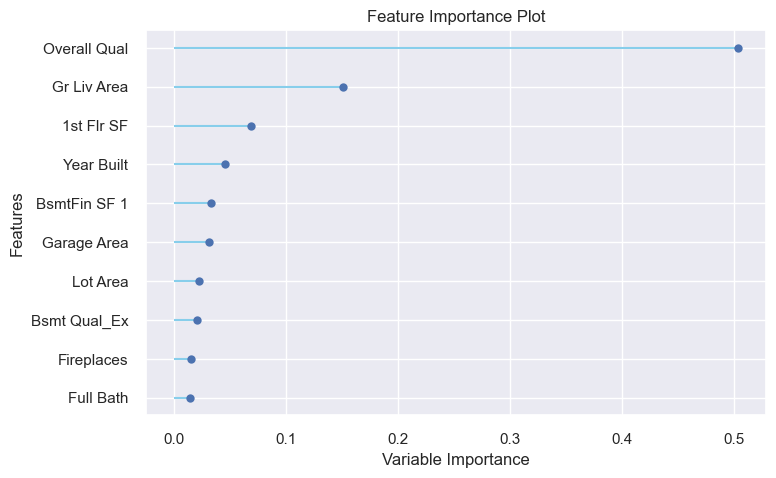

In [86]:
plot_model(best[0], plot = 'feature')

In [87]:
predict_submit(best[0], df_submit_cleaned, df_submit_org, 'Pycaret_Submission')

Pycaret_Submission.csv has been saved in C:\Users\kyunomi\OneDrive - Singapore Management University\Personal\General Assembly Data Science Immersive Program\my_materials\project_2


### Kaggle Score
- Score: 21867.07909
- Public score: 28079.46257

In [88]:
tuned_best = tune_model(best[0], choose_better = True)

In [89]:
print(tuned_best)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=5433, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [90]:
predict_submit(tuned_best, df_submit_cleaned, df_submit_org, 'Tuned_Pycaret_Submission')

Tuned_Pycaret_Submission.csv has been saved in C:\Users\kyunomi\OneDrive - Singapore Management University\Personal\General Assembly Data Science Immersive Program\my_materials\project_2


In [91]:
#calculate improvement over previous kaggle score
1 - 21866.90633/24219.97373

0.09715400298247967

### Kaggle Score (tuned)
- Score: 21866.90633
- Public score: 28088.77878

Based solely only on score, pycaret output a model that is another 9% improvement over the gridsearchcv

## Pycaret model - discard outliers

In [92]:
from pycaret.regression import *
X = df_cleaned.drop(outliers_to_drop)
s = setup(X,
          target = 'SalePrice',
          use_gpu = True,
          log_experiment = True,
          experiment_name = 'GA-dsi32-project-2',
          silent = True)

In [93]:
best = compare_models()

In [94]:
print(best)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)


In [95]:
predict_submit(best, df_submit_cleaned, df_submit_org, 'Pycaret_no_outlier_Submission')

Pycaret_no_outlier_Submission.csv has been saved in C:\Users\kyunomi\OneDrive - Singapore Management University\Personal\General Assembly Data Science Immersive Program\my_materials\project_2


### Kaggle Score
- Score: 22611.62804
- Public score: 26095.16649

In [96]:
tuned_best = tune_model(best, choose_better = True)

In [97]:
predict_submit(tuned_best, df_submit_cleaned, df_submit_org, 'Tuned_Pycaret_no_outlier_Submission')

Tuned_Pycaret_no_outlier_Submission.csv has been saved in C:\Users\kyunomi\OneDrive - Singapore Management University\Personal\General Assembly Data Science Immersive Program\my_materials\project_2


### Kaggle Score (tuned)
- Score: 22614.07375
- Public score: 26083.32133

From the above kaggle score, it seems like discarding the outlier is not doing well for our predictions. Hence we will not discard the outlier for subsequent test

# Final Model (Pycaret with Preprocessing)

In [98]:
from pycaret.regression import *
s = setup(df_cleaned, 
          target = 'SalePrice',
          use_gpu = True,
          categorical_features = categorical_features_cleaned,
          handle_unknown_categorical = True,
          unknown_categorical_method = 'most_frequent',
          normalize = True,
          normalize_method = 'robust', #new
          transformation = True,
          feature_selection = True,
          fold = 5,
          log_experiment = True,
          experiment_name = 'GA-dsi32-project-2',
          silent = True
          
          #remove_outliers = True,
          #transform_target = True, 
          #feature_interaction = True,
          #polynomial_features = True,
          #remove_multicollinearity = True,
          #pca = True,
         )

In [99]:
best = compare_models(n_select=20)

In [100]:
print(best)

[GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=7328, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False), LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              device='gpu', importance_type='split', learning_rate=0.1,
              max_depth=-1, min_child_samples=20, min_child_weight=0.001,
              min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
              objective=None, r

In [103]:
evaluate_model(best[3])

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

Based on the output model by pycaret, the top 8 important  features is as follows
- Neighborhood
- External Quality
- Kitchen Quality
- Functional Rating
- Basement Exposure
- Year Built
- Roof Material
- Square Footage

In [104]:
predict_submit(best[0], df_submit_cleaned, df_submit_org, 'Pycaret_preprocessing_Submission1')

Pycaret_preprocessing_Submission1.csv has been saved in C:\Users\kyunomi\OneDrive - Singapore Management University\Personal\General Assembly Data Science Immersive Program\my_materials\project_2


## Kaggle Score
- Score: 18140.58007
- Public score: 21557.36082

# Model Deployment

## Download model

In [105]:
#Based on logged models on mlflow, this is the best model thus far. Hence, We will select this to deploy.
from mlflow.artifacts import download_artifacts

# Download the desired model from MLFlow to local directory
# Get the URL by following instructions in above image (full path will be from 'model' folder instead for non-hyperparameter runs)
full_path = './mlruns/1/9690700ea6c4424fbd8cd21eee21f264/artifacts/model' # paste copied full path from best_estimator
download_artifacts(full_path, dst_path='.') # download from source: full_path, destination path: where this solution code notebook is located (can reference with '.')

'C:\\Users\\kyunomi\\OneDrive - Singapore Management University\\Personal\\General Assembly Data Science Immersive Program\\my_materials\\project_2\\model'

In [404]:
import mlflow.pyfunc
model = mlflow.pyfunc.load_model(model_uri="./model")

2022/09/26 18:39:11 WARNING mlflow.pyfunc: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - mlflow-skinny (current: uninstalled, required: mlflow-skinny)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.


In [109]:
model.predict(df_submit_cleaned)

array([120482.80721066, 152435.56518225, 224606.64658723, 105166.0755886 ,
       176859.82617548,  91513.53019204, 112245.77337581, 160252.14460684,
       173244.95071709, 173917.34690538, 152050.42869705, 118012.18958954,
       150115.02262179, 268176.02396673, 150573.04957802, 131941.088293  ,
       159292.36169439, 115023.3072532 , 201521.28358133, 181164.30640819,
       153836.50471678, 125797.05285928, 189534.17555349, 173614.42157171,
       180649.58568948, 120176.85377127, 125434.84544371, 108917.64198619,
       163612.5692597 ,  63284.07806275, 110632.9770696 ,  98669.53713539,
       181343.74808167, 155664.42087008, 211313.16277179, 175337.8046428 ,
       106564.66338554,  90276.81726131, 122035.16794241, 189224.18470044,
       158891.65681335, 199952.41097693, 153517.95648284, 157127.70953653,
       203109.47776425,  97752.15855791, 220807.36291588, 122179.92593486,
       129977.96795327, 127642.99935153, 110540.17598873, 191163.64473265,
       231368.86401903, 1

In [ ]:
predict_submit(model, df_submit_cleaned, df_submit_org, 'Downloaded_Model_Submission')

### Kaggle Score
- Score: 17983.57369
- Public score: 22604.85060

## Deploying model

### Flask

In [110]:
%%writefile inference.py 
from flask import Flask, request 
import pandas as pd 
import os 
import mlflow.pyfunc


api = Flask('ModelEndpoint')

model = mlflow.pyfunc.load_model(model_uri="./model")

@api.route('/') 
def home(): 
    return {"message": "Hello!", "success": True}, 200

@api.route('/predict', methods = ['POST']) 
def make_predictions():
    user_input = request.get_json(force=True) 
    df_schema = {'MS SubClass':str,
                 'MS Zoning' : str,
                 'Street' : str,
                 'Alley' : str,
                 'Lot Shape' : str,
                 'Land Contour' : str,
                 'Utilities' : str,
                 'Lot Config' : str,
                 'Land Slope' : str,
                 'Neighborhood' : str,
                 'Condition 1' : str,
                 'Condition 2' : str,
                 'Bldg Type' : str,
                 'House Style' : str,
                 'Roof Style' : str,
                 'Roof Matl' : str,
                 'Exterior 1st' : str,
                 'Exterior 2nd' : str,
                 'Mas Vnr Type' : str,
                 'Exter Qual' : str,
                 'Exter Cond' : str,
                 'Foundation' : str,
                 'Bsmt Qual' : str,
                 'Bsmt Cond' : str,
                 'Bsmt Exposure' : str,
                 'BsmtFin Type 1' : str,
                 'BsmtFin Type 2' : str,
                 'Heating' : str,
                 'Heating QC' : str,
                 'Central Air' : str,
                 'Electrical' : str,
                 'Kitchen Qual' : str,
                 'Functional' : str,
                 'Fireplace Qu' : str,
                 'Garage Type' : str,
                 'Garage Finish' : str,
                 'Garage Qual' : str,
                 'Garage Cond' : str,
                 'Paved Drive' : str,
                 'Pool QC' : str,
                 'Fence' : str,
                 'Misc Feature' : str,
                 'Sale Type' : str,
                 'Lot Frontage' : float,
                 'Lot Area' : float,
                 'Overall Qual' : float,
                 'Overall Cond' : float,
                 'Year Built' : float,
                 'Year Remod/Add' : float,
                 'Mas Vnr Area' : float,
                 'BsmtFin SF 1' : float,
                 'BsmtFin SF 2' : float,
                 'Bsmt Unf SF' : float,
                 'Total Bsmt SF' : float,
                 '1st Flr SF' : float,
                 '2nd Flr SF' : float,
                 'Low Qual Fin SF' : float,
                 'Gr Liv Area' : float,
                 'Bsmt Full Bath' : float,
                 'Bsmt Half Bath' : float,
                 'Full Bath' : float,
                 'Half Bath' : float,
                 'Bedroom AbvGr' : float,
                 'Kitchen AbvGr' : float,
                 'TotRms AbvGrd' : float,
                 'Fireplaces' : float,
                 'Garage Yr Blt' : float,
                 'Garage Cars' : float,
                 'Garage Area' : float,
                 'Wood Deck SF' : float,
                 'Open Porch SF' : float,
                 'Enclosed Porch' : float,
                 '3Ssn Porch' : float,
                 'Screen Porch' : float,
                 'Pool Area' : float,
                 'Misc Val' : float,
                 'Mo Sold' : float,
                 'Yr Sold' : float} # To ensure the feature columns for modeling get the correct datatype, because when Pandas converts from JSON to df, it infers dtype of every col
    user_input_df = pd.read_json(user_input, lines=True, dtype=df_schema) 
    predictions = model.predict(user_input_df).tolist()
    
    return {'predictions': predictions} 
    
if __name__ == '__main__': 
    api.run(host='0.0.0.0', 
            debug=True, 
            port=int(os.environ.get("PORT", 8080))
           ) 

Overwriting inference.py


### Docker

In [111]:
%%writefile Dockerfile

# Use the official lightweight Python image from
# https://hub.docker.com/_/python
FROM python:3.8-slim 


# Copy all the files needed for the app to work
COPY inference.py .
COPY model/ ./model


#we have to do this for our project otherwise gcloud will throw error
RUN apt-get update && apt-get install -y --no-install-recommends apt-utils
RUN apt-get -y install curl
RUN apt-get install libgomp1
# Install all the necessary libraries
RUN pip install -r ./model/requirements.txt



# Run the API!
CMD python inference.py

Overwriting Dockerfile


In [112]:
%%writefile model/requirements.txt
pandas
flask
mlflow-skinny
scikit-learn==0.23.2
pycaret==2.3.10

Overwriting model/requirements.txt


### Testing API

In [113]:
user_input = df_submit_cleaned.to_json(orient="records", lines=True)

In [115]:
import requests

api_url = 'https://ames-house-price-predict-3azjia52jq-as.a.run.app'
api_route = '/predict' 

response = requests.post(f'{api_url}{api_route}', json=user_input)
predictions = response.json()

print(predictions['predictions'][:10])

[120482.80721065556, 152435.56518225351, 224606.64658723315, 105166.0755885968, 176859.8261754845, 91513.53019203866, 112245.77337580733, 160252.14460683987, 173244.95071709028, 173917.34690537507]


### Streamlit

In [56]:
%%writefile streamlit_app.py
import streamlit as st
import requests
import json

# Title of the page
st.image("https://generalassemblydsi32.s3.ap-southeast-1.amazonaws.com/blackfin_logo_white-removebg.png", width =100)
st.title("Ames House Price Prediction")

st.caption("To get your house evaluated, do fill up as much information in the following as possible.")
st.caption("If you are unsure, just leave it as the default value.")
st.caption("Our default value is selected based on the most common selection in Ames for the past years")

Overwriting streamlit_app.py


In [57]:
%%writefile -a streamlit_app.py

st.header("General House Information")
#split into 3 columns
col1, col2 , col3 = st.columns(3)

with col1:
    # Get user inputs
    subclass = st.selectbox("Building Class: ", (20,30,40,45,50,60,70,75,80,85,90,120,150,160,180,190), help = '''
    20 1-STORY 1946 & NEWER ALL STYLES\n
    30 1-STORY 1945 & OLDER\n
    40 1-STORY W/FINISHED ATTIC ALL AGES\n
    45 1-1/2 STORY - UNFINISHED ALL AGES\n
    50 1-1/2 STORY FINISHED ALL AGES\n
    60 2-STORY 1946 & NEWER\n
    70 2-STORY 1945 & OLDER\n
    75 2-1/2 STORY ALL AGES\n
    80 SPLIT OR MULTI-LEVEL\n
    85 SPLIT FOYER\n
    90 DUPLEX - ALL STYLES AND AGES\n
    120 1-STORY PUD (Planned Unit Development) - 1946 & NEWER\n
    150 1-1/2 STORY PUD - ALL AGES\n
    160 2-STORY PUD - 1946 & NEWER\n
    180 PUD - MULTILEVEL - INCL SPLIT LEV/FOYER\n
    190 2 FAMILY CONVERSION - ALL STYLES AND AGES''')
    

with col2:
    
    zoning = st.selectbox("Zoning: ", ('RL', 'RM', 'FV', 'C (all)', 'A (agr)', 'RH', 'I (all)'), help = '''
    A Agriculture\n
    C Commercial\n
    FV Floating Village Residential\n
    I Industrial\n
    RH Residential High Density\n
    RL Residential Low Density\n
    RP Residential Low Density Park\n
    RM Residential Medium Density
    ''')
       

with col3:
    neighborhood = st.selectbox("Neighborhood: ", ('NAmes', 'Sawyer', 'SawyerW', 'Timber', 'Edwards', 'OldTown','BrDale', 'CollgCr', 
                                                   'Somerst', 'Mitchel', 'StoneBr', 'NridgHt','Gilbert', 'Crawfor', 'IDOTRR', 'NWAmes',
                                                   'Veenker', 'MeadowV','SWISU', 'NoRidge', 'ClearCr', 'Blmngtn', 'BrkSide', 'NPkVill',
                                                   'Blueste', 'GrnHill', 'Greens', 'Landmrk'), help = '''
                                                    Blmngtn Bloomington Heights\n
                                                    Blueste Bluestem\n
                                                    BrDale Briardale\n
                                                    BrkSide Brookside\n
                                                    ClearCr Clear Creek\n
                                                    CollgCr College Creek\n
                                                    Crawfor Crawford\n
                                                    Edwards Edwards\n
                                                    Gilbert Gilbert\n
                                                    IDOTRR Iowa DOT and Rail Road\n
                                                    MeadowV Meadow Village\n
                                                    Mitchel Mitchell\n
                                                    Names North Ames\n
                                                    NoRidge Northridge\n
                                                    NPkVill Northpark Villa\n
                                                    NridgHt Northridge Heights\n
                                                    NWAmes Northwest Ames\n
                                                    OldTown Old Town\n
                                                    SWISU South & West of Iowa State University\n
                                                    Sawyer Sawyer\n
                                                    SawyerW Sawyer West\n
                                                    Somerst Somerset\n
                                                    StoneBr Stone Brook\n
                                                    Timber Timberland\n
                                                    Veenker Veenker
                                                    ''')
    

st.header("Lot information")
#split into 3 columns
col1, col2 , col3 = st.columns(3)

with col1:
    alley = st.selectbox("Alley: ", ('NA', 'Pave', 'Grvl'), help = '''
    Grvl Gravel\n
    Pave Paved\n
    NA No alley access
    ''')
    
    street = st.selectbox("Street: ", ('Pave', 'Grvl'), help = '''
    Grvl Gravel\n
    Pave Paved
    ''')
    
    utilities = st.selectbox("Utilities: ", ('AllPub', 'NoSeWa', 'NoSewr'), help = '''
    AllPub All public Utilities (E,G,W,& S)\n
    NoSewr Electricity, Gas, and Water (Septic Tank)\n
    NoSeWa Electricity and Gas Only\n
    ELO Electricity only
    ''')
        
    condition1 = st.selectbox("Condition 1: ", ('Norm', 'RRAe', 'PosA', 'Artery', 'Feedr', 'PosN', 'RRAn', 'RRNe',
                                                'RRNn'), help = '''
                                                Proximity to main road or railroad\n
                                                Artery Adjacent to arterial street\n
                                                Feedr Adjacent to feeder street\n
                                                Norm Normal\n
                                                RRNn Within 200' of North-South Railroad\n
                                                RRAn Adjacent to North-South Railroad\n
                                                PosN Near positive off-site feature--park, greenbelt, etc.\n
                                                PosA Adjacent to postive off-site feature\n
                                                RRNe Within 200' of East-West Railroad\n
                                                RRAe Adjacent to East-West Railroad
                                                ''')
with col2:
    lotshape = st.selectbox("Lot Shape: ", ('Reg', 'IR1', 'IR2', 'IR3'), help = '''
    Reg Regular\n
    IR1 Slightly irregular\n
    IR2 Moderately Irregular\n
    IR3 Irregular
    ''')
        
    landcontour = st.selectbox("Land Contour: ", ('Lvl', 'HLS', 'Bnk', 'Low'), help = '''
    Lvl Near Flat/Level\n
    Bnk Banked - Quick and significant rise from street grade to building\n
    HLS Hillside - Significant slope from side to side\n
    Low Depression
    ''')

    lotconfig = st.selectbox("Lot Config: ", ('Inside', 'CulDSac', 'Corner', 'FR2', 'FR3'), help = '''
    Inside Inside lot\n
    Corner Corner lot\n
    CulDSac Cul-de-sac\n
    FR2 Frontage on 2 sides of property\n
    FR3 Frontage on 3 sides of property
    ''')

    condition2 = st.selectbox("Condition 2: ", ('Norm', 'RRNn', 'Feedr', 'Artery', 'PosA', 'PosN', 'RRAe', 'RRAn'), help = '''
    Proximity to main road or railroad (if a second is present)\n
    Artery Adjacent to arterial street\n
    Feedr Adjacent to feeder street\n
    Norm Normal\n
    RRNn Within 200' of North-South Railroad\n
    RRAn Adjacent to North-South Railroad\n
    PosN Near positive off-site feature--park, greenbelt, etc.\n
    PosA Adjacent to postive off-site feature\n
    RRNe Within 200' of East-West Railroad\n
    RRAe Adjacent to East-West Railroad
    ''')
with col3:
        
    landslope = st.selectbox("Land Slope: ", ('Gtl', 'Sev', 'Mod'), help = '''
    Gtl Gentle slope\n
    Mod Moderate Slope\n
    Sev Severe Slope
    ''')
    
    lotarea = st.number_input("Lot Area: ", min_value = 0, help="Lot size in square feet", value = 10065)

    lotfrontage = st.number_input("Lot Frontage: ", min_value = 0, help="Linear feet of street connected to property", value = 70)

st.header("Building Information")
#split into 3 columns
col1, col2 , col3 = st.columns(3)

with col1:

    bldgtype = st.selectbox("Bldg Type: ", ('1Fam', 'TwnhsE', 'Twnhs', '2fmCon', 'Duplex'), help = '''
    1Fam Single-family Detached\n
    2FmCon Two-family Conversion; originally built as one-family dwelling\n
    Duplx Duplex\n
    TwnhsE Townhouse End Unit\n
    TwnhsI Townhouse Inside Unit
    ''')
        
    housetyle = st.selectbox("House Style: ", ('1Story', '2Story', '1.5Fin', 'SFoyer', 'SLvl', '2.5Unf', '2.5Fin','1.5Unf'), help = '''
    1Story One story\n
    1.5Fin One and one-half story: 2nd level finished\n
    1.5Unf One and one-half story: 2nd level unfinished\n
    2Story Two story\n
    2.5Fin Two and one-half story: 2nd level finished\n
    2.5Unf Two and one-half story: 2nd level unfinished\n
    SFoyer Split Foyer\n
    SLvl Split Level
    ''')
    
    roofstyle = st.selectbox("Roof Style: ", ('Gable', 'Hip', 'Flat', 'Mansard', 'Shed', 'Gambrel'), help = '''
    Flat Flat\n
    Gable Gable\n
    Gambrel Gabrel (Barn)\n
    Hip Hip\n
    Mansard Mansard\n
    Shed Shed
    ''')
        
    masvnrtype = st.selectbox("Mas Vnr Type: ", ('None', 'BrkFace', 'Stone', 'BrkCmn', 'CBlock'), help = '''
    BrkCmn Brick Common\n
    BrkFace Brick Face\n
    CBlock Cinder Block\n
    None None\n
    Stone Stone
    ''')
    
    
    exterqual = st.selectbox("Exter Qual: ", ('TA', 'Gd', 'Ex', 'Fa', 'Po'), help = '''
    Ex Excellent\n
    Gd Good\n
    TA Average/Typical\n
    Fa Fair\n
    Po Poor
    ''')
with col2:
    
    overallqual = st.selectbox("Overall Qual: ", (5.0, 1.0, 2.0, 3.0, 4.0, 6.0, 7.0, 8.0, 9.0, 10.0), help = '''
    Overall material and finish quality\n
    10 Very Excellent\n
    9 Excellent\n
    8 Very Good\n
    7 Good\n
    6 Above Average\n
    5 Average\n
    4 Below Average\n
    3 Fair\n
    2 Poor\n
    1 Very Poor
    ''')
    
    overallcond = st.selectbox("Overall Cond: ", (5.0, 1.0, 2.0, 3.0, 4.0, 6.0, 7.0, 8.0, 9.0, 10.0), help = '''
    Overall condition rating\n
    10 Very Excellent\n
    9 Excellent\n
    8 Very Good\n
    7 Good\n
    6 Above Average\n
    5 Average\n
    4 Below Average\n
    3 Fair\n
    2 Poor\n
    1 Very Poor
    ''')

    roofmatl = st.selectbox("Roof Matl: ", ('CompShg', 'WdShngl', 'Tar&Grv', 'WdShake', 'Membran', 'ClyTile'), help = '''
    ClyTile Clay or Tile\n
    CompShg Standard (Composite) Shingle\n
    Membran Membrane\n
    Metal Metal\n
    Roll Roll\n
    Tar&Grv Gravel & Tar\n
    WdShake Wood Shakes\n
    WdShngl Wood Shingles
    ''')
    
    masvnrarea= st.number_input("Mas Vnr Area: ", min_value = 0, help="Masonry veneer area in square feet", value = 100)

    extercond = st.selectbox("Exter Cond: ", ('TA', 'Gd', 'Fa', 'Ex', 'Po'), help = '''
    Ex Excellent\n
    Gd Good\n
    TA Average/Typical\n
    Fa Fair\n
    Po Poor
    ''')
with col3:

    yearbuilt = st.number_input("Year Built: ", min_value = 0, max_value = 2022, help="Original construction date", value = 1971)

    yearremodadd = st.number_input("Year Remod/Add: ", min_value = 0, max_value = 2022, help="Remodel date (same as construction date if no remodeling or additions)", value = 1984)


    exterior1st = st.selectbox("Exterior 1st: ", ('VinylSd', 'HdBoard', 'Wd Sdng', 'BrkFace', 'Plywood', 'MetalSd',
                                                  'AsbShng', 'CemntBd', 'WdShing', 'Stucco', 'BrkComm', 'Stone',
                                                  'CBlock', 'ImStucc', 'AsphShn'), help = '''
                                                  AsbShng Asbestos Shingles\n
                                                  AsphShn Asphalt Shingles\n
                                                  BrkComm Brick Common\n
                                                  BrkFace Brick Face\n
                                                  CBlock Cinder Block\n
                                                  CemntBd Cement Board\n
                                                  HdBoard Hard Board\n
                                                  ImStucc Imitation Stucco\n
                                                  MetalSd Metal Siding\n
                                                  Other Other\n
                                                  Plywood Plywood\n
                                                  PreCast PreCast\n
                                                  Stone Stone\n
                                                  Stucco Stucco\n
                                                  VinylSd Vinyl Siding\n
                                                  Wd Sdng Wood Siding\n
                                                  WdShing Wood Shingles
                                                  ''')
    
    foundation = st.selectbox("Foundation: ", ('PConc', 'CBlock', 'BrkTil', 'Slab', 'Stone', 'Wood'), help = '''
    BrkTil Brick & Tile\n
    CBlock Cinder Block\n
    PConc Poured Contrete\n
    Slab Slab\n
    Stone Stone\n
    Wood Wood
    ''')
    
st.header("Basement")
#split into 3 columns
col1, col2 , col3 = st.columns(3)

with col1:

    bsmtqual = st.selectbox("Bsmt Qual: ", ('TA', 'Gd', 'Fa', 'Ex', 'Po'), help = '''
    Ex Excellent (100+ inches)\n
    Gd Good (90-99 inches)\n
    TA Typical (80-89 inches)\n
    Fa Fair (70-79 inches)\n
    Po Poor (<70 inches)\n
    NA No Basement
    ''')
    bsmtfintype1 = st.selectbox("BsmtFin Type 1: ", ('GLQ', 'Unf', 'ALQ', 'Rec', 'BLQ', 'LwQ', 'NA'), help = '''
    GLQ Good Living Quarters\n
    ALQ Average Living Quarters\n
    BLQ Below Average Living Quarters\n
    Rec Average Rec Room\n
    LwQ Low Quality\n
    Unf Unfinshed\n
    NA No Basement
    ''')
    
    bsmtfintype2 = st.selectbox("BsmtFin Type 2: ", ('Unf', 'GLQ', 'ALQ', 'Rec', 'BLQ', 'LwQ', 'NA'), help = '''
    GLQ Good Living Quarters\n
    ALQ Average Living Quarters\n
    BLQ Below Average Living Quarters\n
    Rec Average Rec Room\n
    LwQ Low Quality\n
    Unf Unfinshed\n
    NA No Basement
    ''')
    
    heating = st.selectbox("Heating: ", ('GasA', 'GasW', 'Grav', 'Wall', 'OthW'), help = '''
    Floor Floor Furnace\n
    GasA Gas forced warm air furnace\n
    GasW Gas hot water or steam heat\n
    Grav Gravity furnace\n
    OthW Hot water or steam heat other than gas\n
    Wall Wall furnace
    ''')
    
    bsmtfullbath = st.number_input("Bsmt Full Bath: ", min_value = 0, help="Basement full bathrooms", value = 0)

with col2:

    bsmtcond = st.selectbox("Bsmt Cond: ", ('TA', 'Gd', 'Fa', 'Ex', 'Po'), help = '''
    Ex Excellent\n
    Gd Good\n
    TA Typical - slight dampness allowed\n
    Fa Fair - dampness or some cracking or settling\n
    Po Poor - Severe cracking, settling, or wetness\n
    NA No Basement
    ''')
    bsmtfinsf1 = st.number_input("BsmtFin SF 1: ", min_value = 0, help="Type 1 finished square feet", value = 442)
    bsmtfinsf2 = st.number_input("BsmtFin SF 2: ", min_value = 0, help="Type 2 finished square feet", value = 48)

    heatingqc = st.selectbox("Heating QC: ", ('Ex', 'TA', 'Gd', 'Fa', 'Po'), help = '''
    Ex Excellent\n
    Gd Good\n
    TA Average/Typical\n
    Fa Fair\n
    Po Poor
    ''')
    
    bsmthalfbath = st.number_input("Bsmt Half Bath: ", min_value = 0, help="Basement half bathrooms", value = 0)

with col3:

    bsmtexposure = st.selectbox("Bsmt Exposure: ", ('No', 'Gd', 'Av', 'Mn', 'NA') , help = '''
    Gd Good Exposure\n
    Av Average Exposure (split levels or foyers typically score average or above)\n
    Mn Mimimum Exposure\n
    No No Exposure\n
    NA No Basement
    ''')
    bsmtunfsf = st.number_input("Bsmt Unf SF: ", min_value = 0, help="Type 2 finished square feet", value = 568)

    centralair = st.selectbox("Central Air: ", ('Y', 'N'), help = '''N No\n
    Y Yes
    ''')

    electrical = st.selectbox("Electrical: ", ('SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix'), help = '''
    SBrkr Standard Circuit Breakers & Romex\n
    FuseA Fuse Box over 60 AMP and all Romex wiring (Average)\n
    FuseF 60 AMP Fuse Box and mostly Romex wiring (Fair)\n
    FuseP 60 AMP Fuse Box and mostly knob & tube wiring (poor)\n
    Mix Mixed
    ''')
    

    
st.header("Ground Level")
#split into 3 columns
col1, col2 , col3 = st.columns(3)

with col1:
    firstflrsf = st.number_input("1st Flr SF: ", min_value = 0, help="First Floor square feet", value = 1164)
    grlivarea = st.number_input("Gr Liv Area: ", min_value = 0, help="Above grade (ground) living area square feet", value = 1499)
    fullbath = st.number_input("Full Bath: ", min_value = 0, help="Full bathrooms above grade", value = 2)

    functional = st.selectbox("Functional: ", ('Typ', 'Mod', 'Min2', 'Maj1', 'Min1', 'Sev', 'Sal', 'Maj2'), help = '''
    Home functionality rating\n
    Typ Typical Functionality\n
    Min1 Minor Deductions 1\n
    Min2 Minor Deductions 2\n
    Mod Moderate Deductions\n
    Maj1 Major Deductions 1\n
    Maj2 Major Deductions 2\n
    Sev Severely Damaged\n
    Sal Salvage only
    ''')

with col2:
    secondflrsf = st.number_input("2nd Flr SF: ", min_value = 0, help="Second floor square feet", value = 329)
    halfbath = st.number_input("Half Bath: ", min_value = 0, help="Half baths above grade", value = 0)
    kitchenabvgr = st.number_input("Kitchen AbvGr: ", min_value = 0, help="Number of kitchens", value = 1)
    fireplaces = st.number_input("Fireplaces: ", min_value = 0, help="Number of fireplaces", value = 1)

with col3:
    lowqualfinsf = st.number_input("Low Qual Fin SF: ", min_value = 0, help="Low quality finished square feet (all floors)", value = 6)
    bedroomabvgr = st.number_input("Bedroom AbvGr: ", min_value = 0, help="Number of bedrooms above basement level", value = 3)

    kitchenqual = st.selectbox("Kitchen Qual: ", ('TA', 'Gd', 'Fa', 'Ex'), help = '''
    Ex Excellent\n
    Gd Good\n
    TA Typical/Average\n
    Fa Fair\n
    Po Poor
    ''')
    


st.header("Garage")
#split into 3 columns
col1, col2 , col3 = st.columns(3)

with col1:

    garagetype = st.selectbox("Garage Type: ", ('Attchd', 'Detchd', 'BuiltIn', 'Basment', '2Types', 'CarPort', 'NA'), help = '''
    2Types More than one type of garage\n
    Attchd Attached to home\n
    Basment Basement Garage\n
    BuiltIn Built-In (Garage part of house - typically has room above garage)\n
    CarPort Car Port\n
    Detchd Detached from home\n
    NA No Garage
    ''')

    garagecond = st.selectbox("Garage Cond: ", ('TA', 'Fa', 'Po', 'Gd', 'Ex', 'NA'), help = '''
    Ex Excellent\n
    Gd Good\n
    TA Typical/Average\n
    Fa Fair\n
    Po Poor\n
    NA No Garage
    ''')
with col2:

    garagefinish = st.selectbox("Garage Finish: ", ('Unf', 'RFn', 'Fin', 'MA'), help = '''
    Fin Finished\n
    RFn Rough Finished\n
    Unf Unfinished\n
    NA No Garage
    ''')
with col3:
    garagearea = st.number_input("Garage Area: ", min_value = 0, help="Size of garage in square feet", value = 474)


st.header("External")
#split into 3 columns
col1, col2 , col3 = st.columns(3)

with col1:

    paveddrive = st.selectbox("Paved Drive: ", ('Y', 'N', 'P'), help = '''
    Y Paved\n
    P Partial Pavement\n
    N Dirt/Gravel
    ''')
    
    enclosedporch = st.number_input("Enclosed Porch: ", min_value = 0, help="Enclosed porch area in square feet", value = 23)

    fence = st.selectbox("Fence: ", ('NA', 'MnPrv', 'GdPrv', 'GdWo', 'MnWw'), help = '''
    GdPrv Good Privacy\n
    MnPrv Minimum Privacy\n
    GdWo Good Wood\n
    MnWw Minimum Wood/Wire\n
    NA No Fence
    ''')
with col2:
    wooddecksf = st.number_input("Wood Deck SF: ", min_value = 0, help="Wood deck area in square feet", value = 94)

    threessnporch = st.number_input("3Ssn Porch: ", min_value = 0, help="Three season porch area in square feet", value = 3)
with col3:
    openporchsf = st.number_input("Open Porch SF: ", min_value = 0, help="Open porch area in square feet", value = 48)

    screenporch = st.number_input("Screen Porch: ", min_value = 0, help="Screen porch area in square feet", value = 17)

st.header("Misc Features")
#split into 3 columns
col1, col2 , col3 = st.columns(3)

with col1:

    poolarea = st.number_input("Pool Area: ", min_value = 0, help="Pool area in square feet", value = 2)

    mosold = st.number_input("Mo Sold: ", min_value = 0, help="Month Sold", value = 6)

with col2:

    miscfeature = st.selectbox("Misc Feature: ", ('NA', 'Shed', 'TenC', 'Gar2', 'Othr', 'Elev'), help = '''
    Elev Elevator\n
    Gar2 2nd Garage (if not described in garage section)\n
    Othr Other\n
    Shed Shed (over 100 SF)\n
    TenC Tennis Court\n
    NA None
    ''')
    
    yrsold = st.number_input("Yr Sold: ", min_value = 0, help="Year Sold", value = 2008)

with col3:
    
    miscval = st.number_input("Misc Val: ", min_value = 0, help="$Value of miscellaneous feature", value = 52)

    saletype = st.selectbox("Sale Type: ", ('WD ', 'New', 'COD', 'ConLD', 'Con', 'CWD', 'Oth', 'ConLI','ConLw'), help = '''
    WD Warranty Deed - Conventional\n
    CWD Warranty Deed - Cash\n
    VWD Warranty Deed - VA Loan\n
    New Home just constructed and sold\n
    COD Court Officer Deed/Estate\n
    Con Contract 15% Down payment regular terms\n
    ConLw Contract Low Down payment and low interest\n
    ConLI Contract Low Interest\n
    ConLD Contract Low Down\n
    Oth Other
    ''')
    
# Display the inputs
user_input = {'MS SubClass' : subclass, 
              'MS Zoning' : zoning, 
              'Lot Frontage' : lotfrontage, 
              'Lot Area' : lotarea, 
              'Street' : street,
              'Alley' : alley, 
              'Lot Shape' : lotshape, 
              'Land Contour' : landcontour,
              'Utilities' : utilities, 
              'Lot Config' : lotconfig,
              'Land Slope' : landslope, 
              'Neighborhood' : neighborhood, 
              'Condition 1' : condition1, 
              'Condition 2' : condition2, 
              'Bldg Type' : bldgtype,
              'House Style' : housetyle, 
              'Overall Qual' : overallqual, 
              'Overall Cond' : overallcond, 
              'Year Built' : yearbuilt,
              'Year Remod/Add' : yearremodadd, 
              'Roof Style' : roofstyle, 
              'Roof Matl' : roofmatl, 
              'Exterior 1st' : exterior1st,
              'Mas Vnr Type' : masvnrtype, 
              'Mas Vnr Area' : masvnrarea, 
              'Exter Qual' : exterqual, 
              'Exter Cond' : extercond,
              'Foundation' : foundation, 
              'Bsmt Qual' : bsmtqual, 
              'Bsmt Cond' : bsmtcond, 
              'Bsmt Exposure' : bsmtexposure,
              'BsmtFin Type 1' : bsmtfintype1, 
              'BsmtFin SF 1' : bsmtfinsf1, 
              'BsmtFin Type 2' : bsmtfintype2, 
              'BsmtFin SF 2' : bsmtfinsf2,
              'Bsmt Unf SF' : bsmtunfsf, 
              'Heating' : heating, 
              'Heating QC' : heatingqc, 
              'Central Air' : centralair, 
              'Electrical' : electrical,
              '1st Flr SF' : firstflrsf, 
              '2nd Flr SF' : secondflrsf, 
              'Low Qual Fin SF' : lowqualfinsf, 
              'Gr Liv Area' : grlivarea,
              'Bsmt Full Bath' : bsmtfullbath,
              'Bsmt Half Bath' : bsmthalfbath, 
              'Full Bath' : fullbath, 
              'Half Bath' : halfbath,
              'Bedroom AbvGr' : bedroomabvgr, 
              'Kitchen AbvGr' : kitchenabvgr, 
              'Kitchen Qual' : kitchenqual, 
              'Functional' : functional,
              'Fireplaces' : fireplaces, 
              'Garage Type' : garagetype, 
              'Garage Finish' : garagefinish, 
              'Garage Area' : garagearea,
              'Garage Cond' : garagecond, 
              'Paved Drive' : paveddrive, 
              'Wood Deck SF' : wooddecksf,
              'Open Porch SF' : openporchsf,
              'Enclosed Porch' : enclosedporch,
              '3Ssn Porch' : threessnporch, 
              'Screen Porch' : screenporch, 
              'Pool Area' : poolarea, 
              'Fence' : fence,
              'Misc Feature' : miscfeature,
              'Misc Val' : miscval, 
              'Mo Sold' : mosold, 
              'Yr Sold' : yrsold, 
              'Sale Type' : saletype}
#st.write(user_input)

def add_bg_from_url():
    st.markdown(
         f"""
         <style>
         .stApp {{
             background-image: url("https://generalassemblydsi32.s3.ap-southeast-1.amazonaws.com/Background+Image.jpg");
             background-attachment: fixed;
             background-size: cover
         }}
         .h1, .h2, .p, .css-k3w14i, .css-10trblm, .css-81oif8, .css-dg4u6x, .css-rvekum p, .css-1offfwp p{{
             color: #C8C8C8;
         }}
         .css-18ni7ap{{
             background: #000;
         }}
         </style>
         """,
         unsafe_allow_html=True
     )

add_bg_from_url() 

Appending to streamlit_app.py


In [58]:
%%writefile -a streamlit_app.py

# Code to post the user inputs to the API and get the predictions
# Paste the URL to your GCP Cloud Run API here!
api_url = 'https://ames-house-price-predict-3azjia52jq-as.a.run.app'
api_route = '/predict'

response = requests.post(f'{api_url}{api_route}', json=json.dumps(user_input)) # json.dumps() converts dict to JSON
predictions = response.json()

# Add a submit button
if st.button("Submit"): 
    st.write(f"Your house value is expected to be: USD ${predictions['predictions'][0]:,.2f}")

Appending to streamlit_app.py


Model is successfully deployed to our [blackfin website](https://erjieyong-pytho-ames-house-price-predictionstreamlit-app-lmrvb2.streamlitapp.com/)

# Conclusion

Based on our analysis, a house's neighborhood is one of the most important features which confirm conventional thinking. Out of all the neighborhoods, `StoneBr` and `NoRidge` will likely get the higher Sale Price.

The other features features which will increase the selling price of the house are as follows
- Excellent exterior material quality
- Brick Face exterior covering on house
- Excellent kitchen quality
- Typical home functionality rating
- Good basement exposure
- Year Built
- Wood Shingles roof material
- Overall Square foot at above ground living area, basement and lot area

While we are unable to change the certain aspects of the house such as the neighborhood and overall square foot. However, this findings also allow us to advise our internal team at BlackFin to concentrate on sprucing up the other features that can be changed, (such as the quality of the exterior, kitchen) to achieve the highest cost efficiency and achieve the best sales price.

For the home owners, these findings would also serve as a guideline on what to focus on in order to improve the selling price of their houses

Most importantly, we are fairly confident in our prediction model as we have a r2 score of 93.2% which means that our model is able to explain 93.2% of the test salesprice. 

Note: More about [Bayesian Regression](https://towardsdatascience.com/introduction-to-bayesian-linear-regression-e66e60791ea7)

## Further Evaluation
- Update house prices to recent years and months so that it more accurately reflect the current market situation
- Perform more feature engineering such as 
    - Total years lived in = year sold - year built
    - Total Interior square footage = TotalBsmtSF + GrLivArea + GarageArea
    - Total Exterior square footage = LotArea + MasVnrArea + WoodDeckSF + OpenPorchSF + EnclosedPorch + 3SsnPorch + ScreenPorch + PoolArea
    - combination of numerical * categorical features
- Take into account macro economic factors to more accurately predict house prices such as
    - federal interest rate
    - gdp
    - unemployment rate
- Further beautify the streamlit app to include more comments in the help section
    